In [1]:
import pandas as pd
import numpy as np

# Fase 1: **descrizione e prima analisi del Dataset**

Il dataset che abbiamo scelto di analizzare contiene dati su pazienti, e l'obiettivo è riuscire a prevedere la possibilità di avere una malattia cardiaca in base alle previsioni effettuate sulle etichette ed i dati forniti.

Le etichette sono spiegate di seguito:


*   **age**: età dei pazienti
*   **sex**: sesso dei pazienti
  * 0: Female (F)
  * 1: Male (M)
*   **cp**: tipo di male al petto
  * 0: angina tipica
  * 1: angina atipica
  * 2: male non angino
  * 3: asintomatico
*   **trtbps**: pressione sanguigna a riposo al momento del ricovero in ospedale (in mm Hg)
*  **chol**: colesterolo in mg/dl ottenuto tramite sensore IMC (colesterolo sierico in mg/dl)
*  **fbs**: livello di zucchero nel sangue a digiuno
  * 0: <=120 mg/dl
  * 1: >120 mg/dl
*  **restecg**: risultati elettrocardiografici a riposo
  * 0: normale
  *1: anomalia dell'onda ST-T (onda T invertita e/o elevamento del segmento ST o depressione >0,05 mV)
  * 2: ipertrofia ventricolare sinistra probabile o definita secondo i criteri di Estes
*  **thalachh**: massima frequenza cardiaca raggiunta
*  **exng**: angina indotta dall'esercizio
  * 0: no
  * 1: si
* **oldpeak**: depressione ST indotta dall'esercizio fisico rispetto al riposo
* **slp**: la pendenza del segmento ST dell'esercizio di picco
  * 0: in salita
  * 1: piatto
  * 2: in discesa
* **caa**: numero di vasi principali (0-4) colorati per fluorosopia
* **thall**: sconosciuto
* **output**: diagnosi di malattie cardiache




Nel dataset abbiamo una colonna "*thall*" sconosciuta perché non sappiamo cosa i suoi valori rappresentino. Anche per la colonna "*oldpeak*" abbiamo poche informazioni, sappiamo che rappresenta la depressione ST indotta dall'esercizio fisico rispetto al riposo ma non sappiamo i suoi valori cosa dimostrino. Per l'"*output*" invece abbiamo dedotto che il valore 1 indica la presenza di una diagnosi, mentre il valore 0 rappresenta l'assenza di una diagnosi.

Nel file di descrizione delle colonne è presente un errore nell'assegnazione dei valori nella categoria *cp* che rappresenta i tipi di male al petto. Nel file i valori vanno dall'1 al 4 ma nei dataset questi valori vanno dallo 0 al 3.

## Prima analisi e informazioni generali

Analizzeremo e confronteremo di seguito due dataset sullo stesso argoemento, uno "*training*" ed uno "*test*".

> Per poter utilizzare il dataset lo si deve aggiungere, ogni volta che ci si scollega dal Runtime, alla cartella "sample_data". Tramite il comando utilizzato in questo codice noi peschiamo dalla cartella il dataset.







In [2]:
pazienti = pd.read_csv("sample_data/2.train_dataset.csv", sep=",")
print (pazienti)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     64    1   0     120   246    0        0        96     1      2.2    0   
1     47    1   2     138   257    0        0       156     0      0.0    2   
2     59    1   0     110   239    0        0       142     1      1.2    1   
3     58    1   1     120   284    0        0       160     0      1.8    1   
4     52    0   2     136   196    0        0       169     0      0.1    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
235   56    1   1     130   221    0        0       163     0      0.0    2   
236   61    0   0     145   307    0        0       146     1      1.0    1   
237   56    1   2     130   256    1        0       142     1      0.6    1   
238   43    1   2     130   315    0        1       162     0      1.9    2   
239   58    1   2     105   240    0        0       154     1      0.6    1   

     caa  thall  output  
0      1      2       0  

In [3]:
pazientitest = pd.read_csv("sample_data/2.test_dataset.csv", sep=",")
print (pazientitest)

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    59    1   0     164   176    1        0        90     0      1.0    1   
1    47    1   0     112   204    0        1       143     0      0.1    2   
2    49    1   2     118   149    0        0       126     0      0.8    2   
3    45    1   0     104   208    0        0       148     1      3.0    1   
4    58    0   2     120   340    0        1       172     0      0.0    2   
..  ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
58   37    1   2     130   250    0        1       187     0      3.5    0   
59   62    0   0     138   294    1        1       106     0      1.9    1   
60   68    1   2     118   277    0        1       151     0      1.0    2   
61   52    1   0     108   233    1        1       147     0      0.1    2   
62   56    1   0     132   184    0        0       105     1      2.1    1   

    caa  thall  output  
0     2      1       0  
1     0      

Il primo dataset che abbiamo chiamato "pazienti" (training dataset) contiene 240 righe e 14 colonne.

Il secondo dataset che abbiamo chiamato "pazientitest" (test dataset) contiene invece un numero molto ridotto di righe ovvero 63 e sempre 14 colonne.

Il codice utilizzato sopra serve per mostrare tutto il dataset. Non ci sono tutte le righe perché con i dataset grandi mostra solo le prime e le ultime.

###Numero di righe e colonne

Per ottenere il numero di righe e colonne in modo più veloce e semplice possiamo utilizzare questo codice:

In [4]:
#per ottenere il numero di righe
num_righe=pazienti.shape[0]
print ("Numero righe training:", num_righe)

num_righe2=pazientitest.shape [0]
print ("Numero righe test:", num_righe2)

Numero righe training: 240
Numero righe test: 63


In [5]:
#per ottenere il numero di colonne
num_colonne=pazienti.shape[1]
print ("Numero colonne training:", num_colonne)

num_colonne2=pazientitest.shape[1]
print ("Numero colonne test:", num_colonne2)

Numero colonne training: 14
Numero colonne test: 14


###Informazioni generali Dataset

Per ottenere informazioni sul numero di colonne, righe, nomi delle colonne, se ci sono valori nulli e che tipo di valori abbiamo se categorici/numeri/temporali, dobbiamo utilizzare il codice **.info()**

In [6]:
pazienti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       240 non-null    int64  
 1   sex       240 non-null    int64  
 2   cp        240 non-null    int64  
 3   trtbps    240 non-null    int64  
 4   chol      240 non-null    int64  
 5   fbs       240 non-null    int64  
 6   restecg   240 non-null    int64  
 7   thalachh  240 non-null    int64  
 8   exng      240 non-null    int64  
 9   oldpeak   240 non-null    float64
 10  slp       240 non-null    int64  
 11  caa       240 non-null    int64  
 12  thall     240 non-null    int64  
 13  output    240 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.4 KB


In [7]:
pazientitest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       63 non-null     int64  
 1   sex       63 non-null     int64  
 2   cp        63 non-null     int64  
 3   trtbps    63 non-null     int64  
 4   chol      63 non-null     int64  
 5   fbs       63 non-null     int64  
 6   restecg   63 non-null     int64  
 7   thalachh  63 non-null     int64  
 8   exng      63 non-null     int64  
 9   oldpeak   63 non-null     float64
 10  slp       63 non-null     int64  
 11  caa       63 non-null     int64  
 12  thall     63 non-null     int64  
 13  output    63 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 7.0 KB


Entrambi i dataset hanno le stesse informazioni, cambia solo il numero delle righe.

Dal codice utilizzato abbiamo quindi ricavato:
* tutti i nomi delle etichette (uguali in entrambi i dataset)
* tutte le righe contengono valori non nulli (uguale in entrambi i dataset)
* sono tutti valori numerici i dati (int64 o float64)

Non sono presenti valori categorici e valori temporali. Abbiamo 13 colonne con valore **int64** ovvero valori numerici interi a 64 bit (8 byte), può rappresentare sia valori positivi che negativi. Solo una colonna, quella *oldpeak* ha valore **float64** ovvero valori numerici in virgola mobile a 64 bit (8 byte), utile con valori con cui serve una precisione decimale (fino a circa 15-17 cifre significative); viene utilizzato per calcoli scientifici e ingegneristici che richiedono alta precisione.

Abbiamo tutti valori numerici perché sono stati trasformati i valori categorici in numerici. Ad esempio per la categoria sesso, le due categorie "femmina" e "maschio" sono state trasformate rispettivamente nei valori 0 per le femmine e 1 per i maschi. Questo è stato fatto per le seguenti etichette: sex, cp, fbs, restecg, exng, slp.

## Valori nulli

Per sapere se i nostri Dataset contengono valori nulli usiamo il codice **.isnull()**. Se ne contengono dovremmo prenderlo in considerazione per le future analisi.

In [8]:
if pazienti.isnull().values.any():
    print("Il Dataset training contiene valori nulli.")
else:
    print("Il Dataset training non contiene valori nulli.")

Il Dataset training non contiene valori nulli.


In [9]:
if pazientitest.isnull().values.any():
    print("Il Dataset test contiene valori nulli.")
else:
    print("Il Dataset test non contiene valori nulli.")

Il Dataset test non contiene valori nulli.


Entrambi i Dataset non contengono valori nulli.

## Etichetta "sex"

Nel prossimo codice analizziamo quanti uomini e donne sono presenti nei due dataset per verificare se sono equamente distribuiti o se prevale uno dei due sessi.

*Questo passaggio è importante per valutare se la predominanza di un sesso potrebbe influenzare i risultati, compromettendone l'affidabilità.*

In [10]:
uomini = pazienti[pazienti["sex"] == 1]
print (uomini)

print ()

print("Numero di uomini:", uomini.shape[0]) #viene utilizzato questo comando per avere il totale delle righe scritto perché essendo che il dataset è breve non mostra il totale perché vengono scritte tutte le righe

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     64    1   0     120   246    0        0        96     1      2.2    0   
1     47    1   2     138   257    0        0       156     0      0.0    2   
2     59    1   0     110   239    0        0       142     1      1.2    1   
3     58    1   1     120   284    0        0       160     0      1.8    1   
6     70    1   0     130   322    0        0       109     0      2.4    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
234   57    1   0     110   201    0        1       126     1      1.5    1   
235   56    1   1     130   221    0        0       163     0      0.0    2   
237   56    1   2     130   256    1        0       142     1      0.6    1   
238   43    1   2     130   315    0        1       162     0      1.9    2   
239   58    1   2     105   240    0        0       154     1      0.6    1   

     caa  thall  output  
0      1      2       0  

In [11]:
uomini = pazientitest[pazientitest["sex"] == 1]
print (uomini)

print ()

print("Numero di uomini:", uomini.shape[0])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    59    1   0     164   176    1        0        90     0      1.0    1   
1    47    1   0     112   204    0        1       143     0      0.1    2   
2    49    1   2     118   149    0        0       126     0      0.8    2   
3    45    1   0     104   208    0        0       148     1      3.0    1   
5    51    1   2     100   222    0        1       143     1      1.2    1   
6    66    1   1     160   246    0        1       120     1      0.0    1   
7    69    1   2     140   254    0        0       146     0      2.0    1   
9    47    1   0     110   275    0        0       118     1      1.0    1   
10   58    1   2     112   230    0        0       165     0      2.5    1   
11   58    1   2     132   224    0        0       173     0      3.2    2   
12   34    1   3     118   182    0        0       174     0      0.0    2   
14   43    1   0     150   247    0        1       171     0    

In [12]:
donne=pazienti[pazienti["sex"] == 0]
print (donne)
print ()
print("Numero di donne:", donne.shape[0])

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
4     52    0   2     136   196    0        0       169     0      0.1    1   
5     67    0   2     152   277    0        1       172     0      0.0    2   
10    56    0   0     134   409    0        0       150     1      1.9    1   
11    62    0   0     150   244    0        1       154     1      1.4    1   
17    46    0   2     142   177    0        0       160     1      1.4    0   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
222   71    0   2     110   265    1        0       130     0      0.0    2   
223   56    0   1     140   294    0        0       153     0      1.3    1   
224   43    0   0     132   341    1        0       136     1      3.0    1   
233   62    0   0     124   209    0        1       163     0      0.0    2   
236   61    0   0     145   307    0        0       146     1      1.0    1   

     caa  thall  output  
4      0      2       1  

In [13]:
donne=pazientitest[pazientitest["sex"] == 0]
print (donne)
print ()
print("Numero di donne:", donne.shape[0])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
4    58    0   2     120   340    0        1       172     0      0.0    2   
8    41    0   2     112   268    0        0       172     1      0.0    2   
13   58    0   0     130   197    0        1       131     0      0.6    1   
15   60    0   2     102   318    0        1       160     0      0.0    2   
20   62    0   0     140   394    0        0       157     0      1.2    1   
23   56    0   0     200   288    1        0       133     1      4.0    0   
32   51    0   0     130   305    0        1       142     1      1.2    1   
34   55    0   0     180   327    0        2       117     1      3.4    1   
35   41    0   1     130   204    0        0       172     0      1.4    2   
36   65    0   2     140   417    1        0       157     0      0.8    2   
42   62    0   2     130   263    0        1        97     0      1.2    1   
44   39    0   2     138   220    0        1       152     0    

Nel Dataset training abbiamo:
* 160 uomini (67%)
* 80 donne (33%)

Nel Dataset test abbiamo:
* 47 uomini (75%)
* 16 donne (25%)

In entrambi abbiamo una sovrarappresentazione maschile. Nel primo abbiamo il doppio di uomini rispetto alle donne, nel secondo caso abbiamo il triplo di uomini rispetto alle donne. Questo potrebbe influenzare i risultati futuri falsandoli oppure potrebbe essere indice che gli uomini sono più preposti a malattie cardiache ma questo verrà poi analizzato in seguito. Quindi dovremmo capire come mai è presente questa sovrarappresentazione e se influenza i dati.

## Etichetta "età"

###Fasce di età

Ora analizziamo che fasce di età sono presenti nei dataset, in particolare:
* bambini: <18
* adulti: >=18 e <=60
* anziani: >60

In [14]:
bambini = pazienti[pazienti["age"]<18]
print(bambini)

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []


In [15]:
bambini = pazientitest[pazientitest["age"]<18]
print(bambini)

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []


In entrambi i dataset non sono presenti persone con età inferiore a 18. Quindi tutte le persone sono maggiorenni.

In [16]:
anziani=pazienti[pazienti["age"]>60]
print(anziani)
print()
print("Numero anziani:", anziani.shape[0])

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     64    1   0     120   246    0        0        96     1      2.2    0   
5     67    0   2     152   277    0        1       172     0      0.0    2   
6     70    1   0     130   322    0        0       109     0      2.4    1   
9     64    1   3     110   211    0        0       144     1      1.8    1   
11    62    0   0     150   244    0        1       154     1      1.4    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
222   71    0   2     110   265    1        0       130     0      0.0    2   
225   67    1   2     152   212    0        0       150     0      0.8    1   
226   61    1   3     134   234    0        1       145     0      2.6    1   
233   62    0   0     124   209    0        1       163     0      0.0    2   
236   61    0   0     145   307    0        0       146     1      1.0    1   

     caa  thall  output  
0      1      2       0  

In [17]:
anziani=pazientitest[pazientitest["age"]>60]
print(anziani)
print()
print("Numero anziani:", anziani.shape[0])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
6    66    1   1     160   246    0        1       120     1      0.0    1   
7    69    1   2     140   254    0        0       146     0      2.0    1   
17   63    1   0     140   187    0        0       144     1      4.0    2   
20   62    0   0     140   394    0        0       157     0      1.2    1   
36   65    0   2     140   417    1        0       157     0      0.8    2   
41   68    1   2     180   274    1        0       150     1      1.6    1   
42   62    0   2     130   263    0        1        97     0      1.2    1   
43   67    1   0     120   237    0        1        71     0      1.0    1   
46   64    0   0     130   303    0        1       122     0      2.0    1   
54   70    1   0     145   174    0        1       125     1      2.6    0   
56   65    1   0     120   177    0        1       140     0      0.4    2   
59   62    0   0     138   294    1        1       106     0    

In entrambi i dataset abbiamo persone anziane. Nel training ne abbiamo 66 (sono il 27% del totale dei pazienti) e nel test ne abbiamo 13 (sono il 21% del totale dei pazienti). Questo potrebbe essere dato dal fatto che la malattia si presenta prima o che viene diagnosticata relativamente presto rispetto ad altre malattie.

In [18]:
adulti=pazienti[(pazienti["age"] >= 18) & (pazienti["age"] <= 60 )]
print (adulti)
print ()
print("Numero di adulti:", adulti.shape[0])

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
1     47    1   2     138   257    0        0       156     0      0.0    2   
2     59    1   0     110   239    0        0       142     1      1.2    1   
3     58    1   1     120   284    0        0       160     0      1.8    1   
4     52    0   2     136   196    0        0       169     0      0.1    1   
7     52    1   1     134   201    0        1       158     0      0.8    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
234   57    1   0     110   201    0        1       126     1      1.5    1   
235   56    1   1     130   221    0        0       163     0      0.0    2   
237   56    1   2     130   256    1        0       142     1      0.6    1   
238   43    1   2     130   315    0        1       162     0      1.9    2   
239   58    1   2     105   240    0        0       154     1      0.6    1   

     caa  thall  output  
1      0      2       1  

In [19]:
adulti=pazientitest[(pazientitest["age"] >= 18) & (pazientitest["age"] <= 60 )]
print (adulti)
print ()
print("Numero di adulti:", adulti.shape[0])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    59    1   0     164   176    1        0        90     0      1.0    1   
1    47    1   0     112   204    0        1       143     0      0.1    2   
2    49    1   2     118   149    0        0       126     0      0.8    2   
3    45    1   0     104   208    0        0       148     1      3.0    1   
4    58    0   2     120   340    0        1       172     0      0.0    2   
5    51    1   2     100   222    0        1       143     1      1.2    1   
8    41    0   2     112   268    0        0       172     1      0.0    2   
9    47    1   0     110   275    0        0       118     1      1.0    1   
10   58    1   2     112   230    0        0       165     0      2.5    1   
11   58    1   2     132   224    0        0       173     0      3.2    2   
12   34    1   3     118   182    0        0       174     0      0.0    2   
13   58    0   0     130   197    0        1       131     0    

Le persone adulte con un'età compresa tra i 18 e i 60 anni sono 174 nel primo caso (73% del tot) e 50 nel secondo caso (79% del tot).

###Età media, minima e massima

In [20]:
media_età=pazienti["age"].mean()
print("Età media training:", media_età)

print()

media_età2=pazientitest["age"].mean()
print("Età media test:", media_età2)

Età media training: 54.65416666666667

Età media test: 53.26984126984127


Nel codice sopra è stata calcolata l'età media delle persone presenti e si può notare che, anche se abbiamo numeri differenti di persone, l'età media comunque si discosta di pochissimo. Nel training l'età media è di 54 anni e invece nel test è di 53 anni.

Un'altra analisi utile è sapere l'età massima e minima nei due dataset.

In [21]:
min=pazienti["age"].min()
print("Età minima training:", min)

max=pazienti["age"].max()
print ("Età massima training:", max)

Età minima training: 29
Età massima training: 77


In [22]:
min=pazientitest["age"].min()
print("Età minima test:", min)

max=pazientitest["age"].max()
print ("Età massima test:", max)

Età minima test: 34
Età massima test: 70


Come possiamo notare ci sono delle differenze tra i due dataset e questo potrebbe influire l'analisi in futuro. L'età minima nel primo caso è 29 invece nel secondo aumenta a 34. L'età massima nel primo caso è 77 e nel secondo diminuisce a 70. Si può ritenere significativa la differenza perché supera i 5 punti.

## Etichetta "output"

Ora analizziamo quante persone in generale hanno avuto una diagnosi di malattia cardiaca o no.

In [23]:
diagnosi=pazienti[pazienti["output"] == 0]
print (diagnosi)
print ()
print("Persone che non hanno avuto la diagnosi:", diagnosi.shape[0])

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     64    1   0     120   246    0        0        96     1      2.2    0   
2     59    1   0     110   239    0        0       142     1      1.2    1   
3     58    1   1     120   284    0        0       160     0      1.8    1   
6     70    1   0     130   322    0        0       109     0      2.4    1   
10    56    0   0     134   409    0        0       150     1      1.9    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
226   61    1   3     134   234    0        1       145     0      2.6    1   
230   55    1   0     132   353    0        1       132     1      1.2    1   
232   40    1   0     110   167    0        0       114     1      2.0    1   
236   61    0   0     145   307    0        0       146     1      1.0    1   
237   56    1   2     130   256    1        0       142     1      0.6    1   

     caa  thall  output  
0      1      2       0  

In [24]:
diagnosiT=pazientitest[pazientitest["output"] == 0]
print (diagnosiT)
print ()
print("Persone che non hanno avuto la diagnosi:", diagnosiT.shape[0])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    59    1   0     164   176    1        0        90     0      1.0    1   
2    49    1   2     118   149    0        0       126     0      0.8    2   
6    66    1   1     160   246    0        1       120     1      0.0    1   
7    69    1   2     140   254    0        0       146     0      2.0    1   
9    47    1   0     110   275    0        0       118     1      1.0    1   
10   58    1   2     112   230    0        0       165     0      2.5    1   
11   58    1   2     132   224    0        0       173     0      3.2    2   
16   45    1   3     110   264    0        1       132     0      1.2    1   
17   63    1   0     140   187    0        0       144     1      4.0    2   
21   56    1   0     130   283    1        0       103     1      1.6    0   
22   60    1   0     140   293    0        0       170     0      1.2    1   
23   56    0   0     200   288    1        0       133     1    

In [25]:
diagnosi=pazienti[pazienti["output"] == 1]
print (diagnosi)
print ()
print("Persone che hanno avuto la diagnosi:", diagnosi.shape[0])

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
1     47    1   2     138   257    0        0       156     0      0.0    2   
4     52    0   2     136   196    0        0       169     0      0.1    1   
5     67    0   2     152   277    0        1       172     0      0.0    2   
7     52    1   1     134   201    0        1       158     0      0.8    2   
8     52    1   2     172   199    1        1       162     0      0.5    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
233   62    0   0     124   209    0        1       163     0      0.0    2   
234   57    1   0     110   201    0        1       126     1      1.5    1   
235   56    1   1     130   221    0        0       163     0      0.0    2   
238   43    1   2     130   315    0        1       162     0      1.9    2   
239   58    1   2     105   240    0        0       154     1      0.6    1   

     caa  thall  output  
1      0      2       1  

In [26]:
diagnosiT=pazientitest[pazientitest["output"] == 1]
print (diagnosiT)
print ()
print("Persone che hanno avuto la diagnosi:", diagnosiT.shape[0])

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
1    47    1   0     112   204    0        1       143     0      0.1    2   
3    45    1   0     104   208    0        0       148     1      3.0    1   
4    58    0   2     120   340    0        1       172     0      0.0    2   
5    51    1   2     100   222    0        1       143     1      1.2    1   
8    41    0   2     112   268    0        0       172     1      0.0    2   
12   34    1   3     118   182    0        0       174     0      0.0    2   
13   58    0   0     130   197    0        1       131     0      0.6    1   
14   43    1   0     150   247    0        1       171     0      1.5    2   
15   60    0   2     102   318    0        1       160     0      0.0    2   
18   54    1   2     150   232    0        0       165     0      1.6    2   
19   42    1   0     140   226    0        1       178     0      0.0    2   
20   62    0   0     140   394    0        0       157     0    

Le persone che non hanno avuto una diagnosi di malattie cardiche sono nel training 107 (45% del tot) e nel test sono 31 (49% del tot).

Le persone che hanno avuto invece una diagnosi di malattie cardiache sono nel training 133 (55% del tot) e nel test sono 32 (51% del tot).

Abbiamo quasi una situazione di parità tra persone che hanno ricevuto la diagnosi o meno. Non abbiamo grosse differenze anche tra un Dataset e l'altro. La metà dei pazienti ha ricevuto la diagnosi però c'è l'altra parte che è un po' meno delle metà che non l'ha ricevuta. Questo potrebbe essere influenzato anche dall'età delle persone, quindi persone più anziane potrebbero essere più predisposte ad avere una diagnosi.

## Raggruppamenti e ulteriori analisi

Nei prossimi codici analizzeremmo gruppi di valori in combinazione tra di loro.

###Variabile sesso e età

Il primo raggruppamento che analizziamo è la variabile sesso in relazione con l'età. Quindi analizziamo come in base al sesso le persone si suddividono per età.

In [27]:
pazienti.groupby(pazienti["sex"])["age"].mean()

,age
sex,
0,56.0125
1,53.9750


In [28]:
pazientitest.groupby(pazientitest["sex"])["age"].mean()

,age
sex,
0,54.000000
1,53.021277


Questo raggruppamento mostra come l'età media in base al sesso non si discosti molto, sono praticamente identiche. Nel training l'età media delle donne è di 56 anni mentre nel test è di 54. Per gli uomini invece è inferiore ed in entrambi il valore è 53.

Sembrerebbe quindi che il sesso e l'età non influenzino troppo perché sono praticamente simili.

Ora prendiamo in considerazione solo le persone che hanno avuto una diagnosi di malattie cardiache e lo mettiamo in relazione al sesso e all'età.

In [29]:
pazienti[pazienti["output"]==1].groupby("sex")["age"].mean()

,age
sex,
0,54.918033
1,51.527778


In [30]:
pazientitest[pazientitest["output"]==1].groupby("sex")["age"].mean()

,age
sex,
0,52.545455
1,48.761905


I dati mostrano come le donne che hanno ricevuto una diagnosi hanno un'età media di 54 anni nel caso del dataset training e di 52 nel test, non c'è una differenza significativa quindi non dovrebbe influenzare future analisi.
Gli uomini invece che hanno ricevuto una diagnosi hanno un'età media inferiore, nel primo caso è di 51 anni, nel secondo caso di 49. Anche quindi non c'è una differenza significativa.

L'unica differenza significativa si ha tra uomini e donne perché sembrerebbe che le donne ricevano la diagnosi in età più avanzata rispetto agli uomini. Questo potrebbe essere dato da un ritardo nei controlli, nelle visite, nella scoperta della malattia data da molteplici fattori anche culturali.

###Variabile sesso e output

Se analizziamo invece la categoria sesso in relazione all'output otteniamo i seguenti dati:

In [31]:
pazienti.groupby(pazienti["sex"])["output"].mean()

,output
sex,
0,0.7625
1,0.4500


In [32]:
pazientitest.groupby(pazientitest["sex"])["output"].mean()

,output
sex,
0,0.687500
1,0.446809


Da questa analisi sembra che le donne abbiano più probabilità di ricevere una diagnosi rispetto agli uomini.

Nel training dataset il 76% delle donne riceve una diagnosi contro il 45% degli uomini.

Nel test dataset abbiamo invece il 68% delle donne che riceve una diagnosi contro il 44% degli uomini.

Questa analisi però potrebbe essere falsata a causa del fatto che gli uomini sono il doppio e il triplo rispetto alle donne.

Però se teniamo questa analisi contraddice l'analisi precedente perché sembrerebbe che invece le donne sono più predisposte ad avere una diagnosi, anche se in ritardo rispetto agli uomini forse.

###Variabile età e output

In [33]:
pazienti.groupby(pazienti["output"])["age"].mean()

,age
output,
0,56.607477
1,53.082707


In [34]:
pazientitest.groupby(pazientitest["output"])["age"].mean()

,age
output,
0,56.580645
1,50.062500


Da questa analisi si può notare come la media delle persone che hanno ricevuto una diagnosi sia più bassa rispetto a chi non l'ha ricevuta. Questo potrebbe significare che le persone ricevono presto la diagnosi di malattia cardiaca. Quindi l'ipotesi di prima "le persone anziane sono più predisposte" è sbagliata perché da quello che risulta sembra che le persone ricevano presto la diagnosi.

###Variabile cp e output

Ora analizziamo il tipo di male al petto "cp" con la diagnosi di malattia cardiaca.

In [35]:
pazienti.groupby(pazienti["cp"])["output"].mean()

,output
cp,
0,0.254545
1,0.833333
2,0.820896
3,0.714286


In [36]:
pazientitest.groupby(pazientitest["cp"])["output"].mean()

,output
cp,
0,0.333333
1,0.750000
2,0.700000
3,0.500000


Possiamo notare che la maggior parte delle persone, in entrambi i dataset, che ricevono una diagnosi hanno come tipo di male al petto il valore 1 e 2 ovvero angina atipica e male non angino. Le persone invece che hanno meno probabilità di ricevere una diagnosi sono quelle con il valore 0 ovvero l'angina tipica. Questo è un po' strano perché le persone con angina dovrebbero ricevere una diagnosi più facilmente.

###Variabile restecg e output

La prossima analisi viene fatta tra i risultati elettrocardiografici a riposo con la presenza di una diagnosi o meno.

In [37]:
pazienti.groupby(pazienti["restecg"])["output"].mean()

,output
restecg,
0,0.478992
1,0.635593
2,0.333333


In [38]:
pazientitest.groupby(pazientitest["restecg"])["output"].mean()

,output
restecg,
0,0.392857
1,0.617647
2,0.000000


I dati mostrano come la maggioranza delle persone che riceve una diagnosi abbia un'anomalia dell'onda ST-T. Questi dati però sono falsati dal fatto che nel dataset test non sono presenti persone con il valore 2 ovvero le persone con "l'ipertrofia ventricolare sinistra probabile o definita secondo i criteri di Estes" che sono presenti solo nel dataset training. L'assenza di valori nella categoria 2 rende falsato il risultato nella categoria 0 (risultati normali) perché abbassa nel secondo caso la percentuale della categoria 0.

# Fase 2: **Esplorazione dei dati**

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
pazienti = pd.read_csv("sample_data/2.train_dataset.csv", sep=",")
print (pazienti)
pazientitest = pd.read_csv("sample_data/2.test_dataset.csv", sep=",")
print (pazientitest)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     64    1   0     120   246    0        0        96     1      2.2    0   
1     47    1   2     138   257    0        0       156     0      0.0    2   
2     59    1   0     110   239    0        0       142     1      1.2    1   
3     58    1   1     120   284    0        0       160     0      1.8    1   
4     52    0   2     136   196    0        0       169     0      0.1    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
235   56    1   1     130   221    0        0       163     0      0.0    2   
236   61    0   0     145   307    0        0       146     1      1.0    1   
237   56    1   2     130   256    1        0       142     1      0.6    1   
238   43    1   2     130   315    0        1       162     0      1.9    2   
239   58    1   2     105   240    0        0       154     1      0.6    1   

     caa  thall  output  
0      1      2       0  

## **Fase preliminare**

Questa prima fase consiste in un'analisi preliminare necessaria per supportare la successiva formulazione delle ipotesi. La **visualizzazione tramite grafici** permette di individuare più facilmente pattern e relazioni rispetto alla semplice descrizione numerica. L'attenzione si concentra in particolare su sesso, età, tipi di dolore toracico, risultati degli ECG, angina, pendenza del tratto ST e output.

<ipython-input-41-5d19a5f603d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette = "pastel")


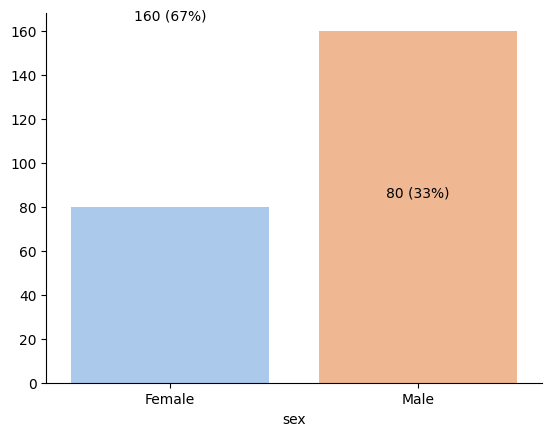

<ipython-input-41-5d19a5f603d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette = "pastel")


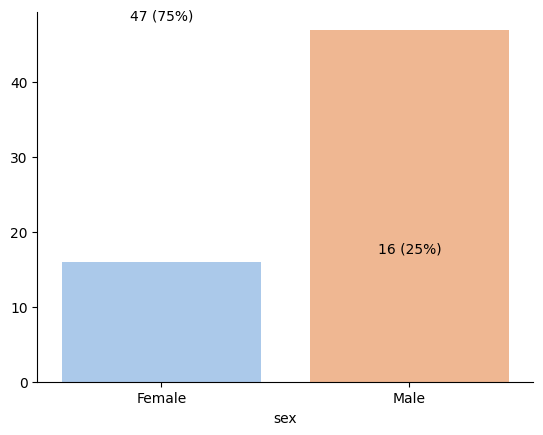

In [41]:
def sex_distribution (sesso):
    counts = sesso["sex"].value_counts() # conta il numero di pazienti che ci sono per ciascun valore di "sex"
    total = len(sesso) # calcola il numero totale di pazienti nel dataset
    sns.barplot(x=counts.index, y=counts.values, palette = "pastel")
    plt.xticks([0, 1], ["Female", "Male"])
    for n, count in enumerate(counts): # enumerate(counts) scorre i dati (i = indice, count = numero di pazienti)
      plt.text(n, count + total * 0.02, str(count) + " (" + str(round((count / total) * 100)) + "%)", ha="center")
    sns.despine()
    plt.show()

sex_distribution(pazienti)
sex_distribution(pazientitest)

In entrambi i Dataset (training e test) si evidenzia uno squilibrio evidente tra pazienti di sesso maschile e femminile.

L'isotogramma rappresenta graficamente quanto già evidenziato dalla preliminare analisi Pandas, ossia che nel **Dataset training** abbiamo:
*   160 uomini (67%)
*   80 donne (33%)

mentre nel **Dataset test** abbiamo:
*   47 uomini (75%)
*   16 donne (25%)





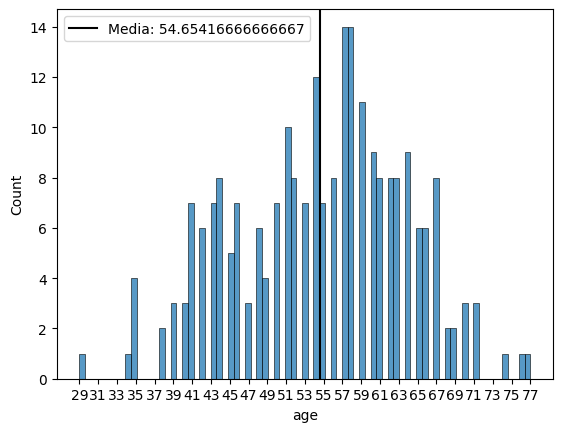

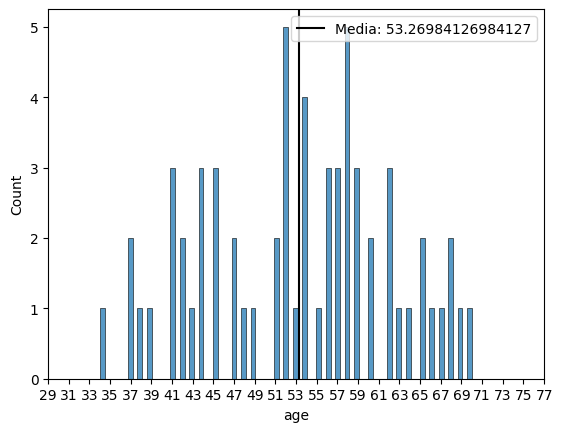

In [42]:
sns.histplot(pazienti["age"], bins= 79) # specifica il numero di intervalli / barre
media_eta = (pazienti["age"].mean()) # .mean() calcola la media dell'età
plt.xticks(range(29, 79, 2)) # funzione per etichettare l'asse X ad intervalli di 2
plt.axvline(media_eta, color = "black", label="Media: " + str(media_eta))
plt.legend()
plt.show()

sns.histplot(pazientitest["age"], bins= 79)
media_eta = (pazientitest["age"].mean())
plt.axvline(media_eta, color = "black", label="Media: " + str(media_eta))
plt.xticks(range(29, 79, 2))
plt.legend()
plt.show()

I due istogrammi mostrano l'età dei pazienti e ogni barra mostra inoltre il numero di soggetti presenti in un determinato range. Seppur i due Dataset hanno un numero di soggetti sensibilmente differente come dimostrato dagli istogrammi precedente, l'età media dei pazienti è molto simile.

Età media Dataset training : 54.7

Età media Dataset test : 53.3


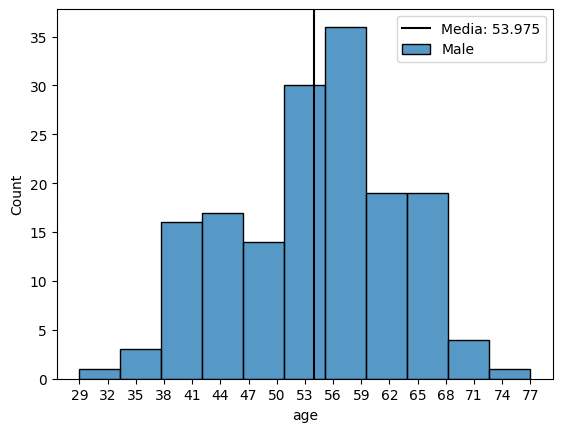

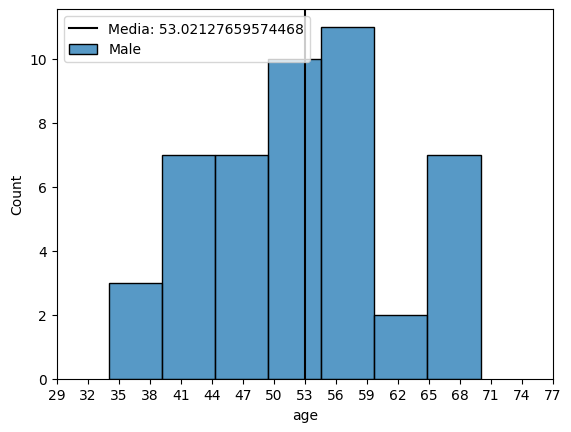

In [43]:
sns.histplot(pazienti[pazienti["sex"] == 1]["age"], label="Male")
media_eta_uomini = pazienti[pazienti["sex"] == 1]["age"].mean()
plt.axvline(media_eta_uomini, color="black", label="Media: " + str(media_eta_uomini)) # plt.axvline() serve per disegnare la linea verticale
plt.xticks(range(29, 79, 3))
plt.legend()
plt.show()

sns.histplot(pazientitest[pazientitest["sex"] == 1]["age"], label="Male")
media_eta_uomini_test = pazientitest[pazientitest["sex"] == 1]["age"].mean()
plt.axvline(media_eta_uomini_test, color="black", label="Media: " + str(media_eta_uomini_test))
plt.xticks(range(29, 79, 3))
plt.legend()
plt.show()

Per quanto riguarda gli uomini, entrambi i dataset mostrano una concentrazione di età tra i 50 e i 60 anni, suggerendo che questa è la fascia d'età più comune. Tuttavia, la distribuzione dell'età nel dataset di training è più ampia e dispersa, con una maggiore presenza di uomini in diverse fasce d'età. Al contrario, il dataset di test presenta una distribuzione più concentrata, con le età maggiormente raggruppate attorno alla media. Ciò suggerisce che l'età degli uomini nel dataset di training è più variabile, mentre nel dataset di test è meno variabile, indicando una maggiore omogeneità nel gruppo.

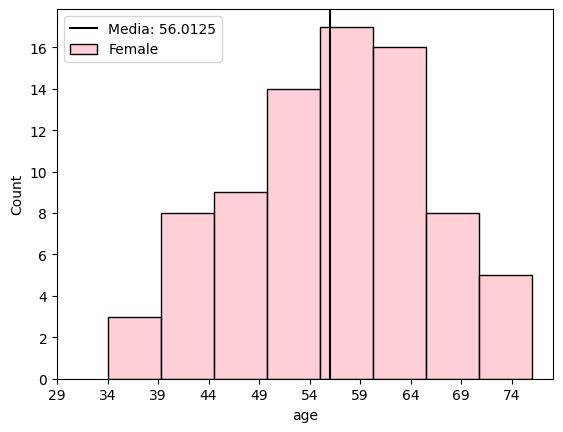

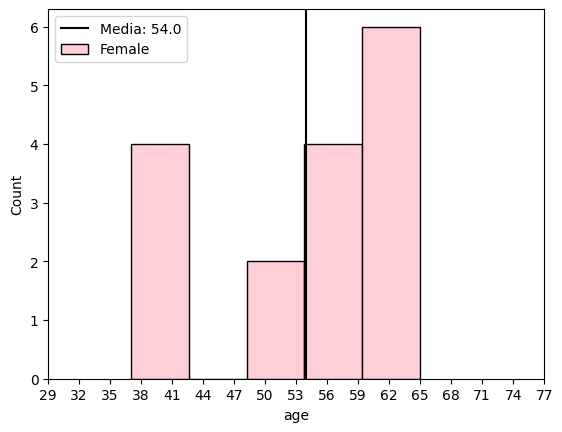

In [44]:
sns.histplot(pazienti[pazienti["sex"] == 0]["age"], label="Female", color="pink")
media_eta_donne = pazienti[pazienti["sex"] == 0]["age"].mean()
plt.axvline(media_eta_donne, label="Media: " + str(media_eta_donne), color="black")
plt.xticks(range(29, 79, 5))
plt.legend()
plt.show()

sns.histplot(pazientitest[pazientitest["sex"] == 0]["age"], label="Female", color="pink")
media_eta_donne_test = pazientitest[pazientitest["sex"] == 0]["age"].mean()
plt.axvline(media_eta_donne_test, label="Media: " + str(media_eta_donne_test), color="black")
plt.xticks(range(29, 79, 3))
plt.legend()
plt.show()

Le differenze tra i due dataset sono più evidenti quando si considerano le donne. La distribuzione dell'età nel dataset di training è più dispersa, con una maggiore variabilità e una media leggermente superiore. Al contrario, il dataset di test presenta una distribuzione più concentrata, con una minore variabilità e una media leggermente inferiore. Ciò suggerisce che l'età delle donne nel dataset di training è più variabile, mentre nel dataset di test è meno variabile, indicando una maggiore omogeneità nel gruppo.

Concludendo, le osservazioni sugli istogrammi sono coerenti con l'analisi precedente, in cui avevamo notato differenze nella distribuzione dell'età tra i due dataset, sia per gli uomini che per le donne. La diversa dimensione dei campioni (dataset di training più grande, dataset di test più piccolo) potrebbe contribuire a queste differenze.

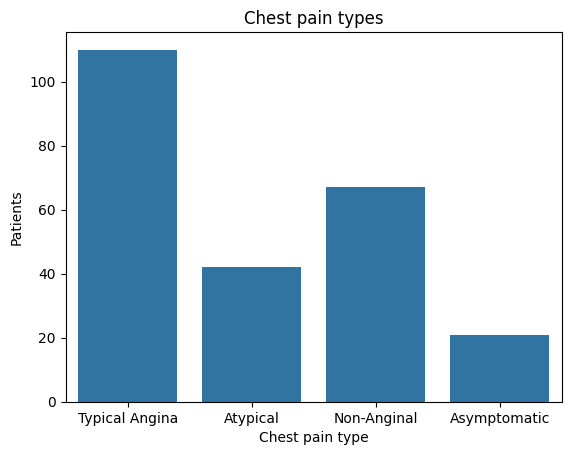

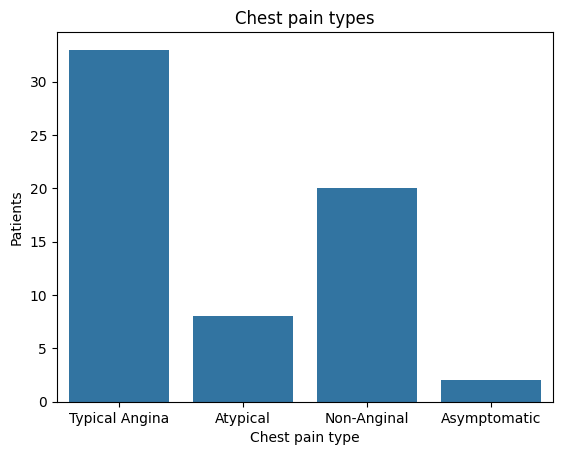

In [45]:
sns.countplot(x="cp", data=pazienti)
plt.xticks([0,1,2,3],["Typical Angina", "Atypical", "Non-Anginal", "Asymptomatic"])
plt.title("Chest pain types")
plt.xlabel("Chest pain type")
plt.ylabel("Patients")
plt.show()

sns.countplot(x="cp", data=pazientitest)
plt.xticks([0,1,2,3], ["Typical Angina", "Atypical", "Non-Anginal", "Asymptomatic"])
plt.title("Chest pain types")
plt.xlabel("Chest pain type")
plt.ylabel("Patients")
plt.show()

I boxplot mostrano la distribuzione dei livelli di colesterolo. Entrambi rivelano una distribuzione simile, con la maggior parte dei valori compresi tra circa 200 e 300 mg/dl. Tuttavia, il dataset di training mostra una maggiore presenza di valori outlier verso valori più elevati di colesterolo. Nel complesso, i boxplot suggeriscono che la distribuzione del colesterolo è abbastanza simile nei due Dataset, con la principale differenza nella presenza di un maggior numero di valori estremi nel dataset di training.

<ipython-input-46-a357b8fcde60>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pazienti["restecg"], palette= "pastel")


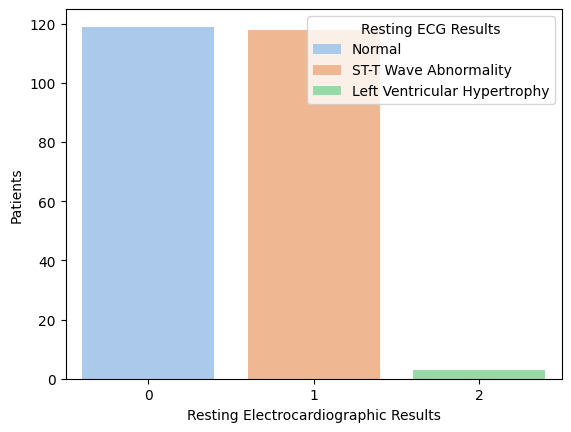

<ipython-input-46-a357b8fcde60>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pazientitest ["restecg"], palette= "pastel")


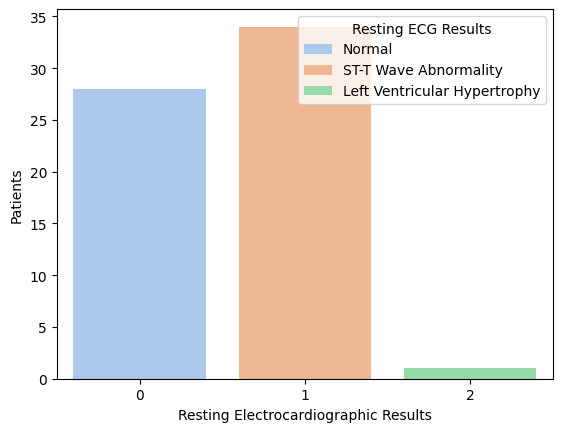

In [46]:
sns.countplot(x=pazienti["restecg"], palette= "pastel")
plt.xlabel("Resting Electrocardiographic Results")
plt.ylabel("Patients")
plt.xticks([0, 1, 2], ["0", "1", "2"])
plt.legend(title="Resting ECG Results", labels=["Normal", "ST-T Wave Abnormality", "Left Ventricular Hypertrophy"])
plt.show()

sns.countplot(x=pazientitest ["restecg"], palette= "pastel")
plt.xlabel("Resting Electrocardiographic Results")
plt.ylabel("Patients")
plt.xticks([0, 1, 2], ["0", "1", "2"])
plt.legend(title="Resting ECG Results", labels=["Normal", "ST-T Wave Abnormality", "Left Ventricular Hypertrophy"])
plt.show()

I risultati dell'ECG a riposo mostrano una distribuzione simile nei gruppi di training e test, con una maggioranza di pazienti con ECG normale, seguita da pazienti con anomalie dell'onda ST-T e una minoranza con ipertrofia ventricolare sinistra. Tuttavia, il numero assoluto di pazienti in ciascuna categoria varia tra i due gruppi a causa delle diverse dimensioni del campione.

<ipython-input-47-3ebd53ddbf3d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pazienti["exng"], palette="Set2")


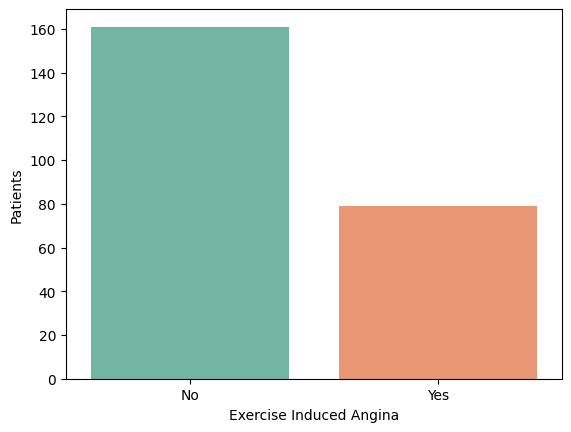

<ipython-input-47-3ebd53ddbf3d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pazientitest ["exng"], palette="Set2")


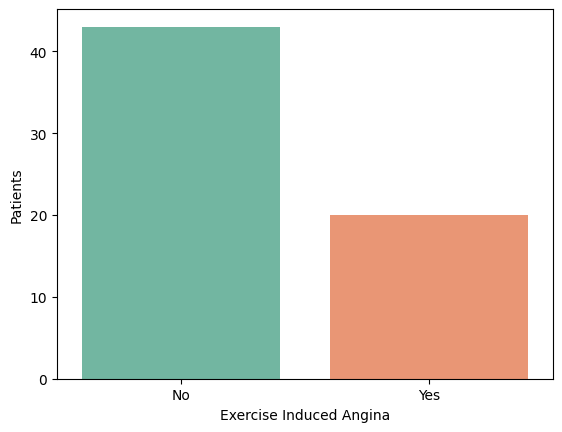

In [47]:
sns.countplot(x=pazienti["exng"], palette="Set2")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Patients")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

sns.countplot(x=pazientitest ["exng"], palette="Set2")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Patients")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

Questi istogrammi mostrano che la maggior parte dei pazienti in entrambi i dataset **non** ha angina indotta da esercizio fisico. Tuttavia, il dataset di training mostra un numero maggiore di pazienti senza angina rispetto al dataset di test, coerentemente con la sua maggiore dimensione complessiva. Confrontandoli, si può notare che la proporzione di pazienti con angina indotta da esercizio fisico sembra essere leggermente superiore nel dataset di test rispetto al dataset di training.

<ipython-input-48-25e26fa663e1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pazienti["slp"], palette="pastel")


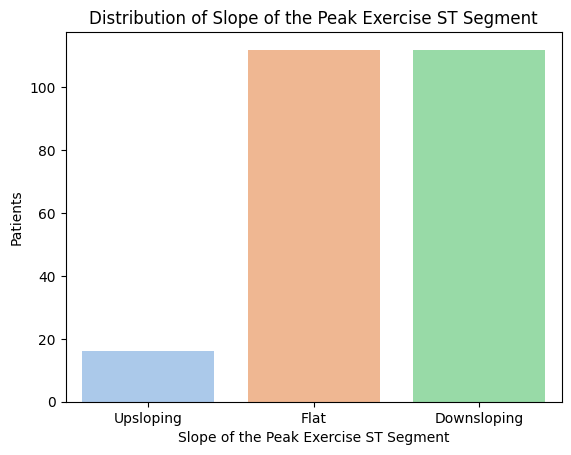

<ipython-input-48-25e26fa663e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pazientitest["slp"], palette="pastel")


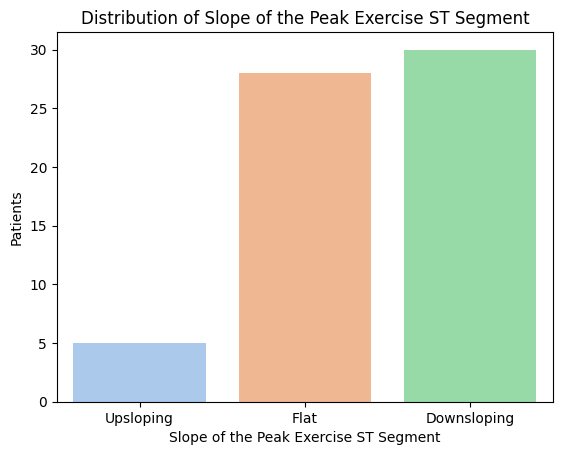

In [48]:
sns.countplot(x=pazienti["slp"], palette="pastel")
plt.xlabel("Slope of the Peak Exercise ST Segment")
plt.ylabel("Patients")
plt.xticks([0, 1, 2], ["Upsloping", "Flat", "Downsloping"])
plt.title("Distribution of Slope of the Peak Exercise ST Segment")
plt.show()

sns.countplot(x=pazientitest["slp"], palette="pastel")
plt.xlabel("Slope of the Peak Exercise ST Segment")
plt.ylabel("Patients")
plt.xticks([0, 1, 2], ["Upsloping", "Flat", "Downsloping"])
plt.title("Distribution of Slope of the Peak Exercise ST Segment")
plt.show()

I grafici mostrano la distribuzione dei pazienti in base alla pendenza del tratto ST durante l'esercizio fisico (slp). In entrambi i dataset la maggior parte dei pazienti ha una **pendenza downsloping**, seguita da una pendenza piatta (Flat) e infine da una pendenza verso l'alto (Upsloping).

<ipython-input-49-5702c65bf30b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["output"], palette="pastel")


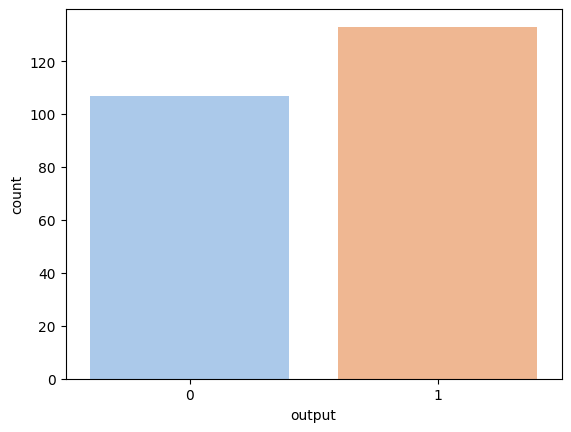

<ipython-input-49-5702c65bf30b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["output"], palette="pastel")


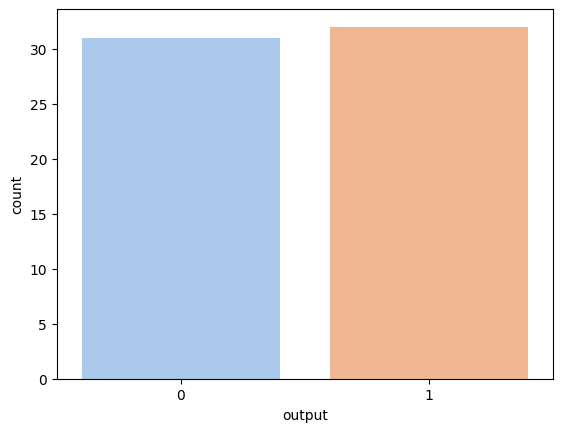

In [49]:
def output_distribution(data):
    sns.countplot(x=data["output"], palette="pastel")
    plt.show()

output_distribution(pazienti)
output_distribution(pazientitest)

I grafici mostrano che **in entrambi i dataset ci sono più pazienti senza malattia cardiaca che con malattia cardiaca**. Tuttavia, il dataset training ha un numero maggiore di pazienti totali, quindi anche un numero maggiore di pazienti in ogni categoria.  Il dataset di test, invece, mostra una proporzione leggermente superiore di pazienti con malattia cardiaca rispetto al dataset di training.  In entrambi i casi, la proporzione di pazienti con malattia cardiaca è minoritaria rispetto ai pazienti senza malattia.

## IPOTESI N. 1 L'età e il sesso possono essere considerati fattori determinanti per formulare una diagnosi di malattia cardiovascolare?

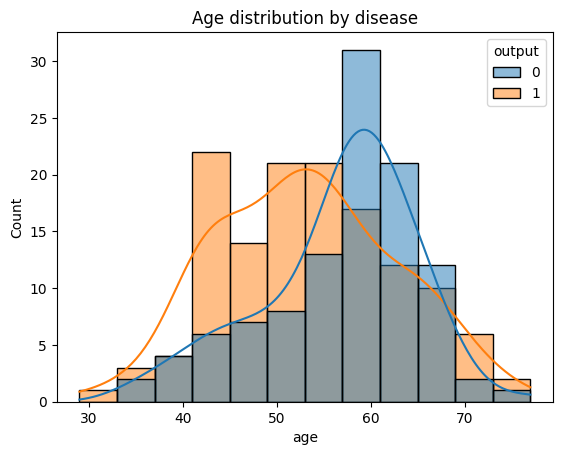

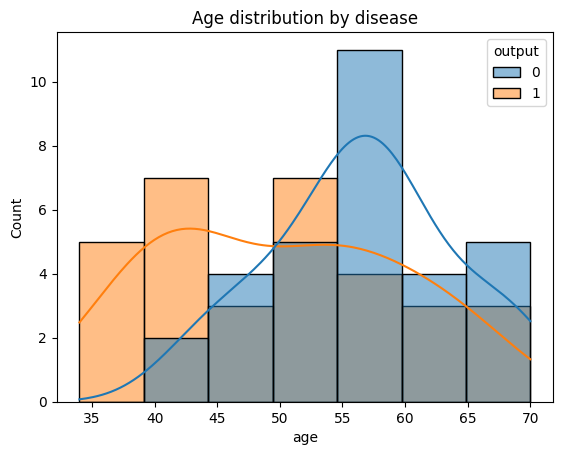

In [50]:
sns.histplot(pazienti, x='age', hue='output', kde=True) # kde= True - densità di probabilità della variabile
plt.title('Age distribution by disease')
plt.show()

sns.histplot(pazientitest, x='age', hue='output', kde=True)
plt.title('Age distribution by disease')
plt.show()

I due istogrammi mostrano la distribuzione dell'età nei due dataset separatamente per pazienti con e senza diagnosi di malattia cardiaca.

L'istogramma relativo al Dataset training rivela una sovrapposizione significativa tra le distribuzioni dell'età dei due gruppi, suggerendo che l'età da sola potrebbe non essere un fattore discriminante. Tuttavia, si può osservare una tendenza, ossia che il picco della distribuzione per i pazienti con malattia cardiaca è spostato leggermente verso età più avanzate rispetto ai pazienti senza malattia. Questo suggerisce che **l'età gioca un ruolo, ma non in maniera determinante**. Si nota inoltre come le curve abbiano dei picchi, indicando come alcune fasce d'età vengano maggiormente colpite di altre.

Nel secondo dataset, l'istogramma mostra un quadro simile. La sovrapposizione è altrettanto presente ma la differenza tra le distribuzioni è meno marcata.

L'età sembra essere un elemento da tenere in considerazione, con una leggera tendenza che mostra i pazienti con malattia cardiaca essere più anziani. Tuttavia, **la sovrapposizione dei dati suggerisce che l'età da sola non è sufficiente per una diagnosi.**

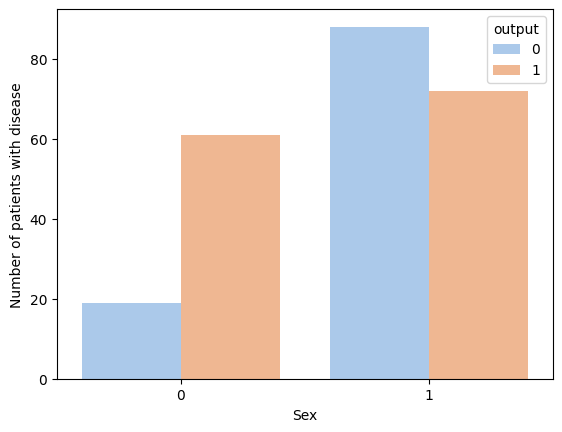

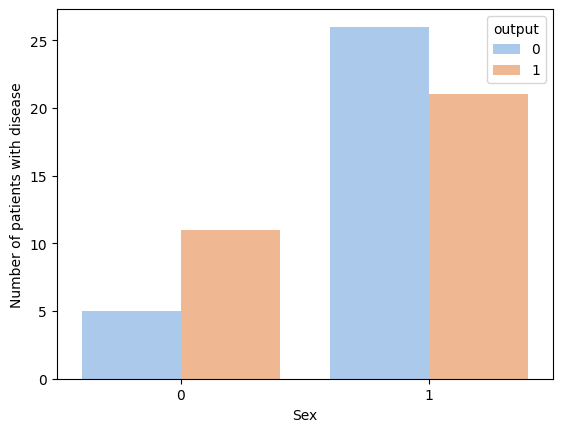

In [51]:
def output_distribution(data):
    sns.countplot(x="sex", hue="output", data=data, palette="pastel")
    plt.xlabel("Sex")
    plt.ylabel("Number of patients with disease")
    plt.show()

output_distribution(pazienti)
output_distribution(pazientitest)

I due grafici a barre mostrano la presenza della malattia cardiaca (output = 1) per sesso (0 = Female, 1 = Male).

Entrambi i dataset mostrano una tendenza simile: un numero notevolmente maggiore di uomini con malattia cardiaca rispetto alle donne. Questa differenza è evidente, suggerendo che il sesso maschile potrebbe essere un fattore di rischio per la malattia cardiaca.

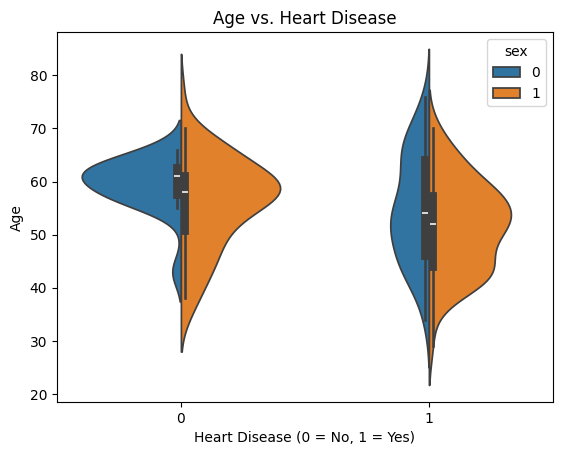

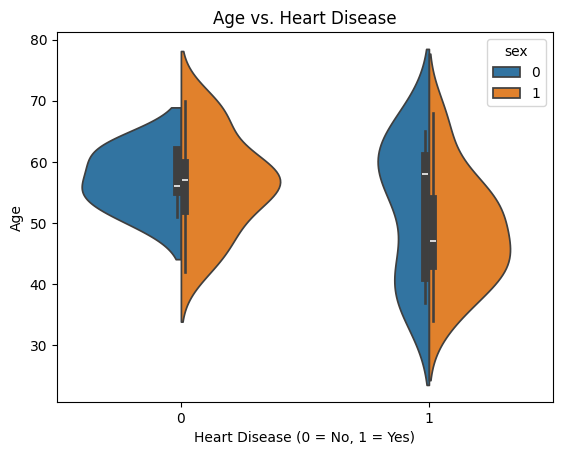

In [52]:
sns.violinplot(x="output", y="age", hue="sex", data=pazienti, split=True)  # split = True fonde i due violini in un unico grafico per renderli il confronto tra le distribuzioni più semplice
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age vs. Heart Disease")
plt.show()

sns.violinplot(x="output", y="age", hue="sex", data=pazientitest, split=True)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age vs. Heart Disease")
plt.show()

I due grafici mostrano la distribuzione dell'età (Age) in relazione alla presenza di malattia cardiaca (Heart Disease), distinguendo tra uomini (sex = 1) e donne (sex = 0), per due gruppi di pazienti: training set e test set.

Analizzando il grafico relativo al training set, si nota una leggera tendenza per i pazienti con malattia cardiaca (Heart Disease = 1) ad avere un'età media leggermente superiore rispetto a quelli senza malattia (Heart Disease = 0), soprattutto nel gruppo delle donne. Tuttavia, questa differenza non sembra essere molto marcata. Inoltre, si osserva che gli uomini con malattia cardiaca tendono ad avere un'età media leggermente inferiore rispetto alle donne con la stessa condizione. La variabilità dell'età, rappresentata dalla lunghezza dei baffi, sembra essere maggiore nel gruppo delle donne con malattia cardiaca.

Queste tendenze si confermano anche nel grafico relativo al test set: i pazienti con malattia cardiaca tendono ad avere un'età media leggermente superiore, soprattutto nel gruppo delle donne, e gli uomini con malattia cardiaca tendono ad avere un'età media leggermente inferiore rispetto alle donne con la stessa condizione. Anche in questo caso, la variabilità dell'età sembra essere maggiore nel gruppo delle donne con malattia cardiaca.

L'analisi grafica dei dati relativi a età, sesso e malattia cardiaca (output) di entrambi i dataset ha evidenziato alcune tendenze interessanti, ma ha anche evidenziato come ***questi dati presi separatamente da tutti gli altri siano insufficienti per predirre l'output***.

**Età**:

1. Si osserva una debole correlazione tra età e malattia cardiaca con una leggera tendenza verso età più avanzate nei pazienti malati, questa associazione NON è sufficientemente forte da consentire una predizione affidabile. La sovrapposizione delle distribuzioni dell'età tra i due gruppi (malati e non malati) è significativa, suggerendo che l'età da sola non è un fattore determinante.

**Sesso**:

2. Il sesso sembra essere un fattore di rischio più significativo rispetto all'età, con una maggiore prevalenza di malattia cardiaca negli uomini visibile entrambi i dataset. Anche in questo caso, la presenza di donne con malattia cardiaca indica che il sesso da solo non è sufficiente per una predizione accurata.

**Età e sesso**:

L'analisi combinata di età e sesso fornisce informazioni leggermente più utili rispetto ai singoli fattori considerati singolarmente. Si notano alcune differenze nella distribuzione dell'età tra uomini e donne con malattia cardiaca, ma queste differenze non sono comunque sufficienti per una predizione precisa.

## IPOTESI N. 2 : Il tipo di dolore toracico (cp) ha un impatto sullo sviluppo della malattia cardiaca?

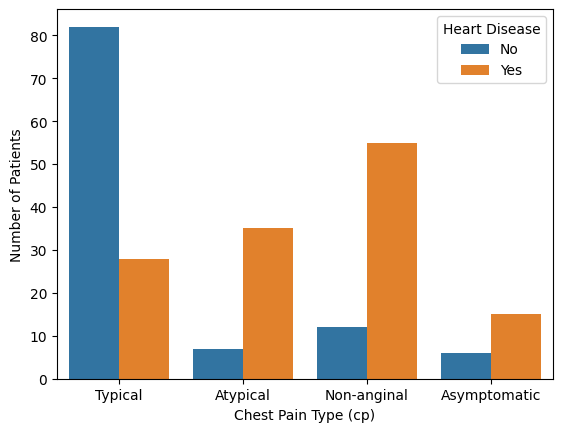

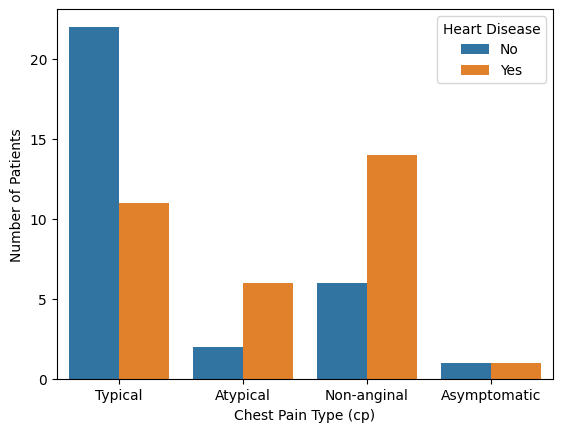

In [53]:
sns.countplot(data= pazienti, x="cp", hue="output")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0,1,2,3], labels=["Typical", "Atypical", "Non-anginal", "Asymptomatic"]) # specifica dove le etichette devono apparire
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

sns.countplot(data= pazientitest, x="cp", hue="output")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0,1,2,3], labels=["Typical", "Atypical", "Non-anginal", "Asymptomatic"])
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

Istogrammi a barre raggruppate che mostrano la distribuzione del tipo di dolore toracico (cp) in relazione alla presenza o assenza di malattia cardiaca (output).

In entrambi i dataset, **dolore non anginoso** (cp = 2) e **dolore asintomatico** (cp = 3) sembrano associati a una maggiore incidenza di malattia cardiaca.

E' interessante notare che seppur l'angina tipica è meno associata alla malattia cardiaca rispetto ad altri tipi di dolore,una parte dei pazienti con questo tipo di dolore ha comunque ricevuto una diagnosi di malattia cardiaca. Ciò signfica che probabilmente è un'altra varaibile ad aver provocato l'insorgere della malattia.

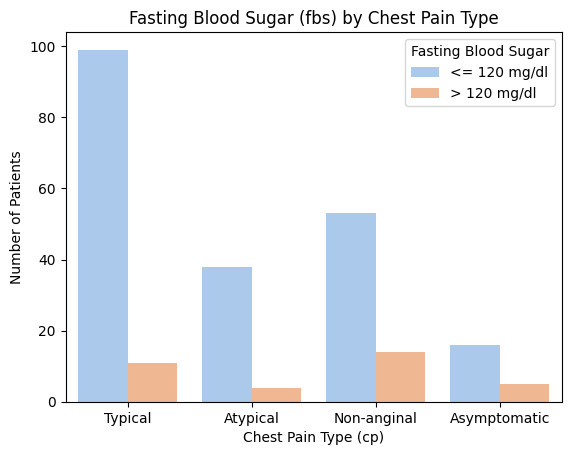

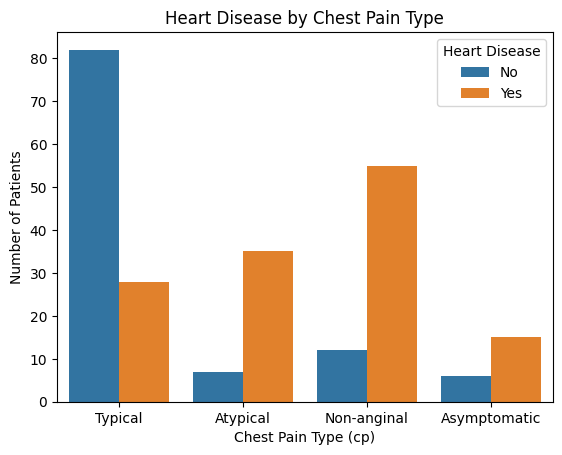

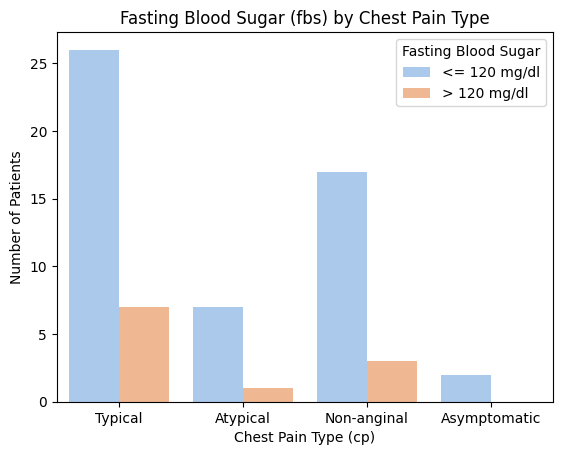

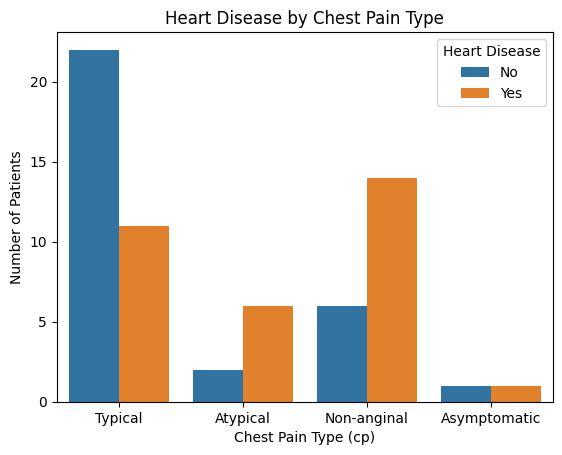

In [54]:
sns.countplot(data=pazienti, x="cp", hue="fbs", palette = "pastel")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Number of Patients")
plt.title("Fasting Blood Sugar (fbs) by Chest Pain Type")
plt.xticks(ticks=[0,1,2,3], labels=["Typical", "Atypical", "Non-anginal", "Asymptomatic"])
plt.legend(title="Fasting Blood Sugar", labels=["<= 120 mg/dl", "> 120 mg/dl"])
plt.show()

sns.countplot(data=pazienti, x="cp", hue="output")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Number of Patients")
plt.title("Heart Disease by Chest Pain Type")
plt.xticks(ticks=[0,1,2,3], labels=["Typical", "Atypical", "Non-anginal", "Asymptomatic"])
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()



sns.countplot(data=pazientitest, x="cp", hue="fbs", palette="pastel")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Number of Patients")
plt.title("Fasting Blood Sugar (fbs) by Chest Pain Type")
plt.xticks(ticks=[0,1,2,3], labels=["Typical", "Atypical", "Non-anginal", "Asymptomatic"])
plt.legend(title="Fasting Blood Sugar", labels=["<= 120 mg/dl", "> 120 mg/dl"])
plt.show()

sns.countplot(data=pazientitest, x="cp", hue="output")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Number of Patients")
plt.title("Heart Disease by Chest Pain Type")
plt.xticks(ticks=[0,1,2,3], labels=["Typical", "Atypical", "Non-anginal", "Asymptomatic"])
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

Si costruisconi 4 grafici separati per facilitare la lettura. I grafici 1 e 3 mostrano la relazione tra il tipo di dolore toracico (cp) e il livello di zucchero nel sangue (fbs). I grafici 2 e 4, invece, mostrano la relazione tra il tipo di dolore toracico (cp) e la presenza o assenza di malattia cardiaca (output).

Dall'osservazione dei grafici NON sembra esserci una forte correlazione tra dolore toracico e livello di zucchero nel sangue. L'fbs infatti sembra distribuita in modo simile tra tutti i tipi di dolore presentati (questo vale per entrambi i Dataset).

Come da istogramma precedente si evidenzia invece una relazione tra cp e probabilità di avere una malattia cardiaca. I pazienti con dolore non anginoso (cp= 2) e dolore asintomatico (cp= 3) hanno una maggiore incidenza di malattia cardiaca (output= 1).





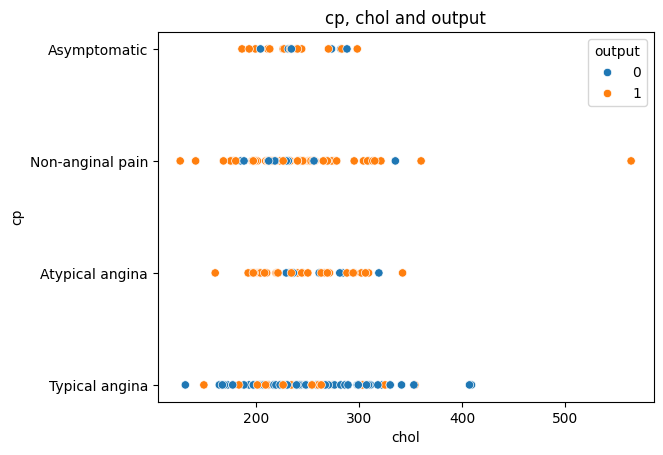

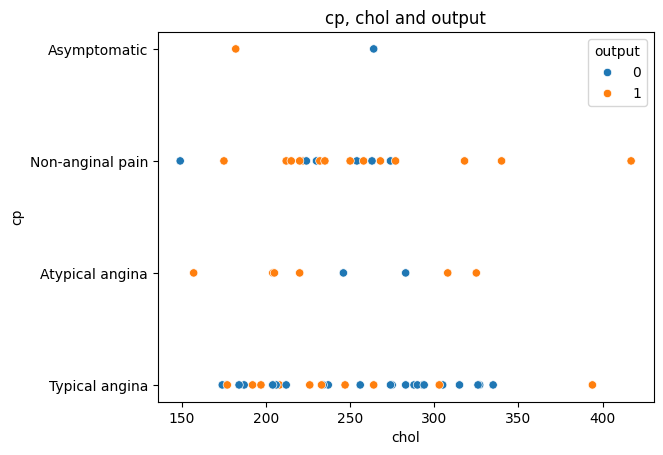

In [55]:
sns.scatterplot(data=pazienti, x="chol", y="cp", hue="output")
plt.xlabel("chol")
plt.ylabel("cp")
plt.title("cp, chol and output")
plt.yticks([0,1,2,3], ["Typical angina", "Atypical angina", "Non-anginal pain", "Asymptomatic"])
plt.show()

sns.scatterplot(data=pazientitest, x="chol", y="cp", hue="output")
plt.xlabel("chol")
plt.ylabel("cp")
plt.title("cp, chol and output")
plt.yticks([0,1,2,3], ["Typical angina", "Atypical angina", "Non-anginal pain", "Asymptomatic"])
plt.show()

Questi scatter plot rappresentano la relazione tra il tipo di dolore toracico (cp), i livelli di colesterolo (chol) e l'output.

Il grafico del Dataset training suggerisce che i pazienti con dolore non anginoso (cp = 2) e livelli di colesterolo elevati tendono ad avere una maggiore probabilità di malattia cardiaca (output = 1). Non viene confermata l'ipotesi per cui dolore asintomatico (cp= 3) = maggior incidenza della malattia.

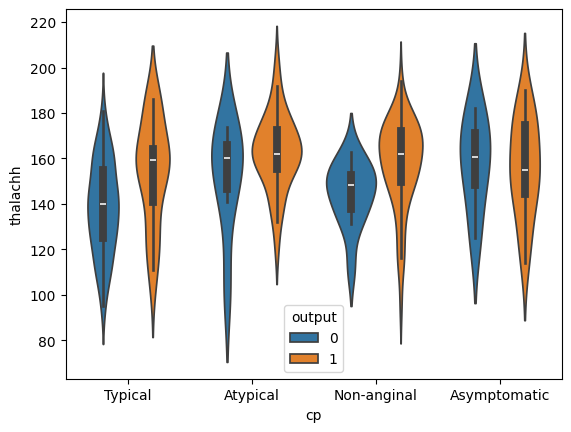

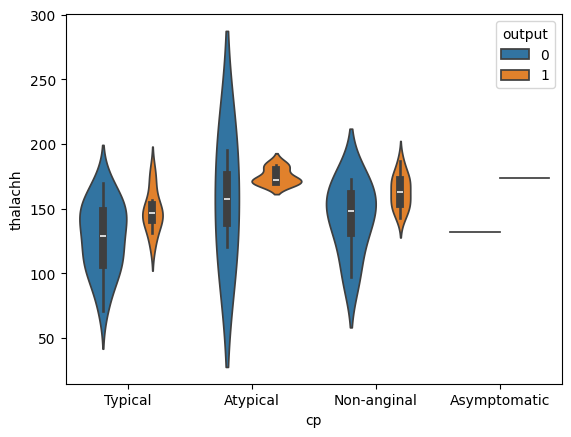

In [56]:
sns.violinplot(x='cp', y='thalachh', data=pazienti, hue='output')
plt.xticks(ticks=[0,1,2,3], labels=["Typical", "Atypical", "Non-anginal", "Asymptomatic"])
plt.show()

sns.violinplot(x='cp', y='thalachh', data=pazientitest, hue='output')
plt.xticks(ticks=[0,1,2,3], labels=["Typical", "Atypical", "Non-anginal", "Asymptomatic"])
plt.show()

L'analisi dei grafici a violino che mostrano la relazione tra il tipo di dolore toracico (cp), la frequenza cardiaca massima (thalachh) e la presenza di malattia cardiaca (output).

- In generale, i pazienti malati tendono ad avere una frequenza cardiaca massima inferiore rispetto a quelli senza malattia, indipendentemente dal tipo di dolore toracico.
- Il tipo di dolore toracico influenza la relazione tra thalachh e output. Per esempio, nel caso di angina atipica (cp= 1) e dolore non anginoso (cp= 2), la differenza nella distribuzione di thalachh tra pazienti con e senza malattia cardiaca è più evidente.
- Pazienti con angina tipica (cp= 0) mostrano una maggiore variabilità nella frequenza cardiaca massima, mentre quelli con dolore asintomatico (cp= 3) presentano una distribuzione più concentrata verso valori inferiori di thalachh.

**Concludendo, la frequenza cardiaca massima (thalachh) potrebbe essere un fattore predittivo per la malattia cardiaca, soprattutto in combinazione con il tipo di dolore toracico (cp).**

## IPOTESI N. 3 : Come influisce pendenza del tratto ST durante l'esercizio fisico (slp) sulla diagnosi?

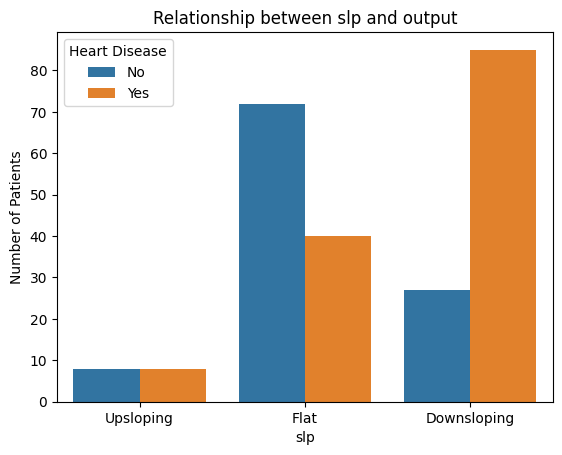

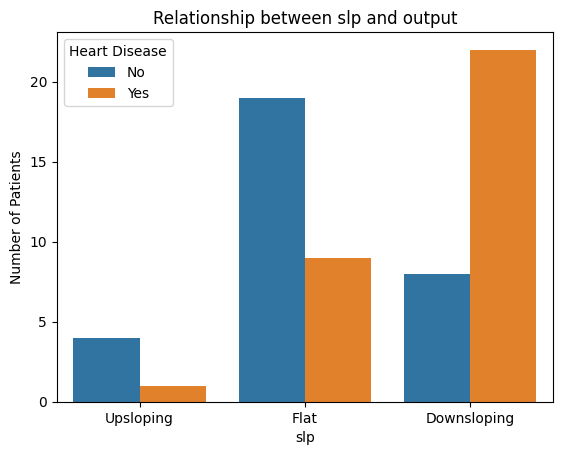

In [57]:
sns.countplot(x='slp', hue='output', data=pazienti)
plt.title('Relationship between slp and output')
plt.xlabel("slp")
plt.ylabel('Number of Patients')
plt.xticks([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

sns.countplot(x='slp', hue='output', data=pazientitest)
plt.title('Relationship between slp and output')
plt.xlabel('slp')
plt.ylabel('Number of Patients')
plt.xticks([0, 1, 2], ['Upsloping', 'Flat', 'Downsloping'])
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

Questi count plto mostrano la relazione tra la pendenza del tratto ST durante l'esercizio fisico (slp) e la presenza o assenza di malattia cardiaca (output).
Dall'oservazione di entrambi si nota che:
1. la *pendenza downsloping* è la più frequente tra i pazienti ed è anche associata a una maggiore incidenza di malattia cardiaca.

2. Anche la *pendenza flat* mostra una tendenza simile, seppur meno marcata, suggerendo una maggiore probabilità di malattia rispetto all'assenza di malattia.

3. La *pendenza upsloping* è la meno frequente e sembra essere associata a una minore probabilità di malattia cardiaca.

Sulla base di queste osservazioni preliminari, **si ipotizza che la pendenza del tratto ST durante l'esercizio fisico (slp) possa essere un fattore rilevante per la diagnosi di malattia cardiaca.**  

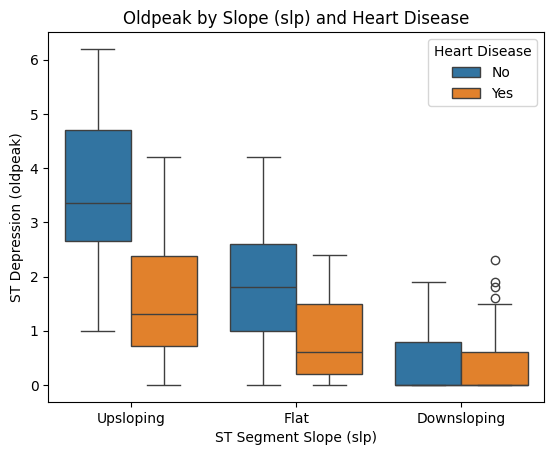

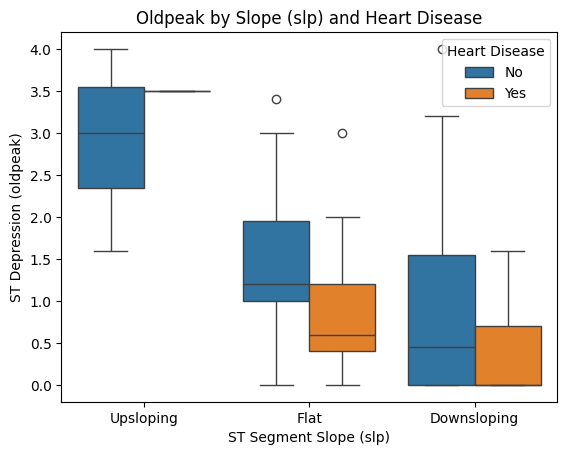

In [58]:
def plot_boxplot(data):
    sns.boxplot(x="slp", y="oldpeak", hue="output", data=data)
    plt.title("Oldpeak by Slope (slp) and Heart Disease")
    plt.xlabel("ST Segment Slope (slp)")
    plt.ylabel("ST Depression (oldpeak)")
    plt.xticks([0, 1, 2], ["Upsloping", "Flat", "Downsloping"])
    plt.legend(title="Heart Disease", labels=["No", "Yes"], handles=plt.gca().get_legend_handles_labels()[0]) # per gestire la legenda sennò negli output risulterebbero entrambi blu [0]
    plt.show()

plot_boxplot(pazienti)
plot_boxplot(pazientitest)

I grafici mostrano la relazione tra la pendenza del tratto ST durante uno sforzo fisico (slp), la depressione del tratto ST (oldpeak) e la presenza o meno di una malattia cardiaca (output).

- *Pendenza downsloping* sembra essere associato a valori di oldpeak più elevati, soprattutto nei pazienti con malattia cardiaca. Questo potrebbe indicare una maggiore gravità della condizione in questi pazienti.
- *Pendenza Upsloping*, invece, è associato a valori di oldpeak generalmente più bassi e a una minore probabilità di malattia cardiaca. Questo suggerisce che slp = Upsloping potrebbe essere un segno positivo.
- *Pendenza Flat* si posiziona a metà strada, con valori di oldpeak intermedi e una probabilità di malattia cardiaca che si colloca tra le altre due pendenze.



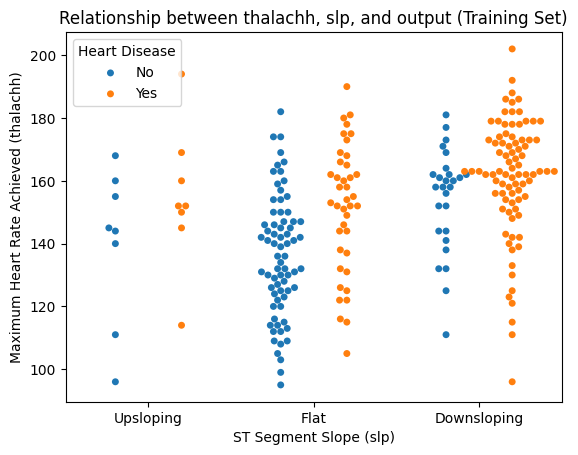

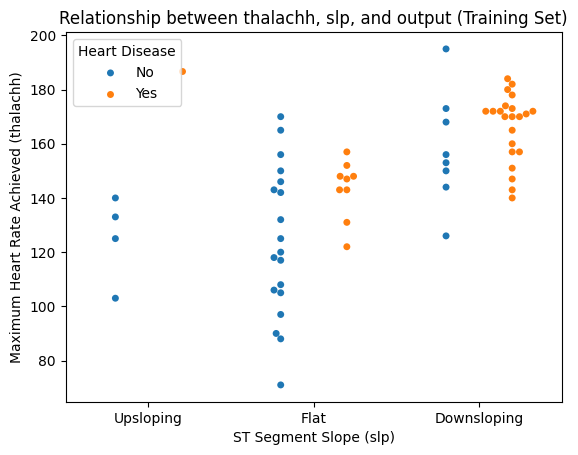

In [59]:
sns.swarmplot(data=pazienti, x="slp", y="thalachh", hue="output", hue_order=[0, 1], dodge=True) # per separare le etichette della variabile categoriche così che i punti non si sovrappongano
plt.xticks([0, 1, 2], ["Upsloping", "Flat", "Downsloping"])
plt.title("Relationship between thalachh, slp, and output (Training Set)")
plt.xlabel("ST Segment Slope (slp)")
plt.ylabel("Maximum Heart Rate Achieved (thalachh)")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

sns.swarmplot(data=pazientitest, x="slp", y="thalachh", hue="output", hue_order=[0, 1], dodge=True)
plt.xticks([0, 1, 2], ["Upsloping", "Flat", "Downsloping"])
plt.title("Relationship between thalachh, slp, and output (Training Set)")
plt.xlabel("ST Segment Slope (slp)")
plt.ylabel("Maximum Heart Rate Achieved (thalachh)")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

Dai grafici swarmplot possiamo osservare una potenziale correlazione tra una pendenza discendente del segmento ST  (Downsloping), una frequenza cardiaca massima (thalachh) generalmente inferiore e una maggiore probabilità di malattia cardiaca.



**Sulla base delle analisi e dei grafici che sono stati presentati si può quindi affermare che tra le variabili relative alla pendenza del segmento ST (slp), il Downsloping sembra essere la categoria più frequentemente associata a una possibile diagnosi di malattia cardiaca in entrambi i dataset.**

## IPOTESI N. 4: Il trtbps è un fattore determinante nella diagnosi?

<ipython-input-60-fccda8f67c99>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='output', y='trtbps', data=pazienti, palette = "pastel")


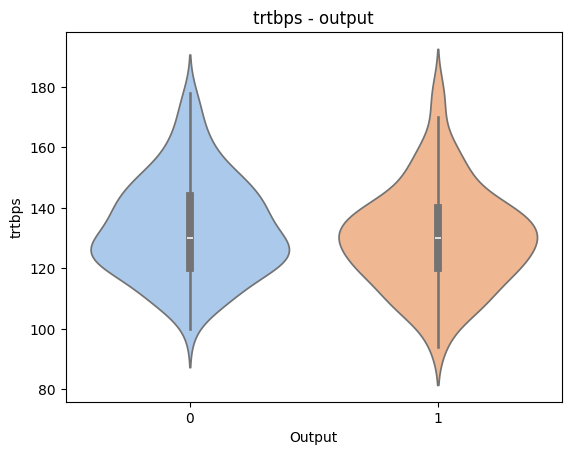

<ipython-input-60-fccda8f67c99>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='output', y='trtbps', data=pazientitest, palette = "pastel")


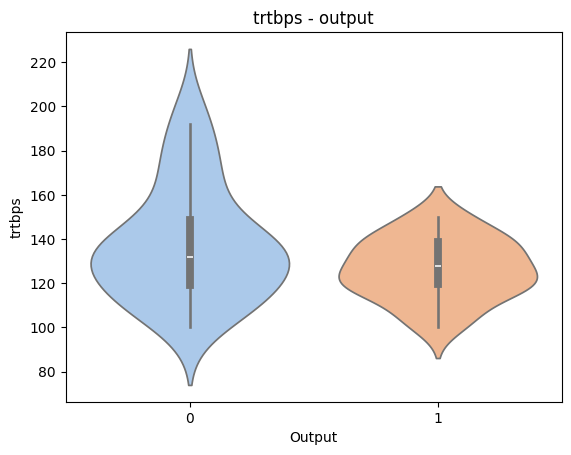

In [60]:
sns.violinplot(x='output', y='trtbps', data=pazienti, palette = "pastel")
plt.title('trtbps - output')
plt.xlabel('Output')
plt.ylabel('trtbps')
plt.show()

sns.violinplot(x='output', y='trtbps', data=pazientitest, palette = "pastel")
plt.title('trtbps - output')
plt.xlabel('Output')
plt.ylabel('trtbps')
plt.show()

I violini rappresentano la correlazione tra pressione sanguigna a riposo (trtbps) e la presenza di malattie cardiache (output). I pazienti malati tendono ad avere una pressione sanguigna a riposo più alta rispetto ai pazienti sani. Questo è evidente dallo spostamento del violino 1 verso valori di trtbps più elevati.

Oltre ad avere una pressione media più alta, i pazienti con la malattia mostrano anche una maggiore variabilità nella loro pressione sanguigna a riposo. Questo è indicato dalla maggiore larghezza del violino.

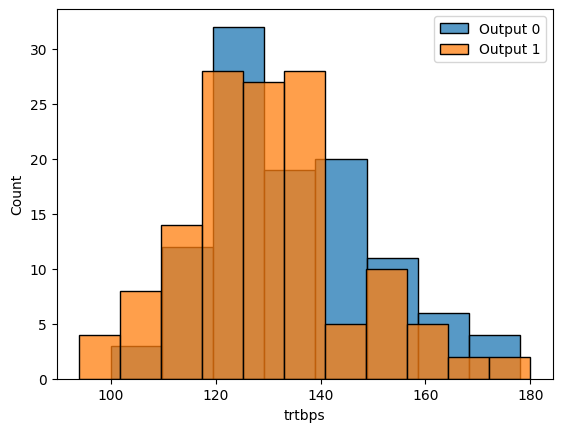

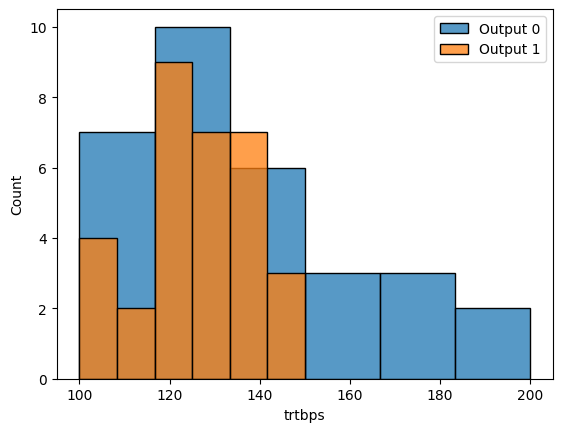

In [61]:
sns.histplot(data=pazienti[pazienti['output'] == 0], x='trtbps', label='Output 0')
sns.histplot(data=pazienti[pazienti['output'] == 1], x='trtbps', label='Output 1')
plt.legend()
plt.show()

sns.histplot(data=pazientitest[pazientitest['output'] == 0], x='trtbps', label='Output 0')
sns.histplot(data=pazientitest[pazientitest['output'] == 1], x='trtbps', label='Output 1')
plt.legend()
plt.show()

Negli histplot che mostrano la distribuzione di trtbps per entrambi i gruppi di output si vede che la distribuzione per il gruppo con malattia presente è leggermente spostata verso destra rispetto al gruppo senza malattia. Questo suggerisce che i pazienti con malattia tendono ad avere una pressione sanguigna a riposo più alta. C'è però una sovrapposizione tra le distribuzioni dei due gruppi soprattutto al centro. **Questo suggerisce che la pressione sanguigna a riposo da sola non è un indicatore perfetto della presenza di malattia.**

## IPOTESI N. 5 : Esiste una tipologia di ECG (restecg) che porta a maggiori diagnosi positive rispetto ad altre?

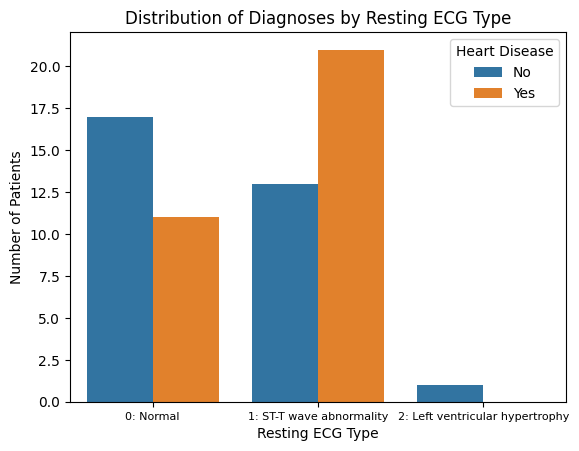

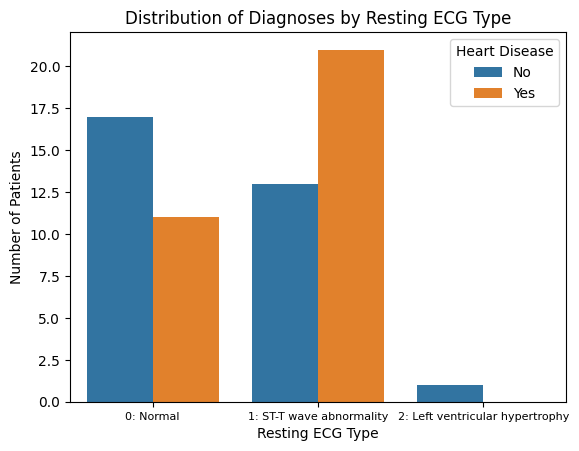

In [62]:
sns.countplot(x="restecg", hue="output", data=pazientitest)
plt.title("Distribution of Diagnoses by Resting ECG Type")
plt.xlabel("Resting ECG Type")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0, 1, 2], labels=["0: Normal", "1: ST-T wave abnormality", "2: Left ventricular hypertrophy"], fontsize = 8)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

sns.countplot(x="restecg", hue="output", data=pazientitest)
plt.title("Distribution of Diagnoses by Resting ECG Type")
plt.xlabel("Resting ECG Type")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0, 1, 2], labels=["0: Normal", "1: ST-T wave abnormality", "2: Left ventricular hypertrophy"], fontsize = 8)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

In entrambi i dataset, il gruppo con 'Anomalie dell'onda ST-T' (restecg= 1) mostra un numero maggiore di pazienti con diagnosi positiva ('Heart Disease = Yes') rispetto al gruppo 'Normale' (restecg = 0). Questo suggerisce una **possibile associazione tra anomalie ST-T e malattia cardiaca**.  

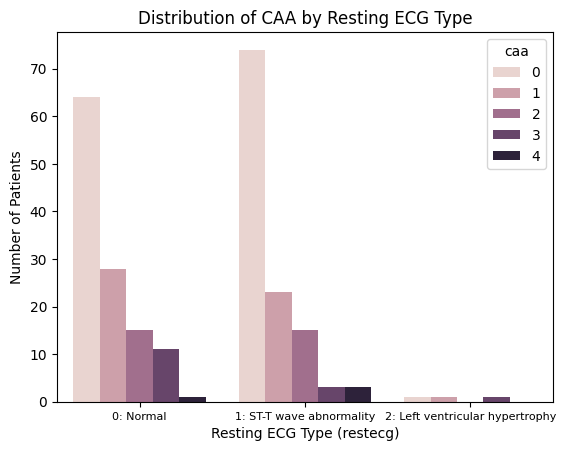

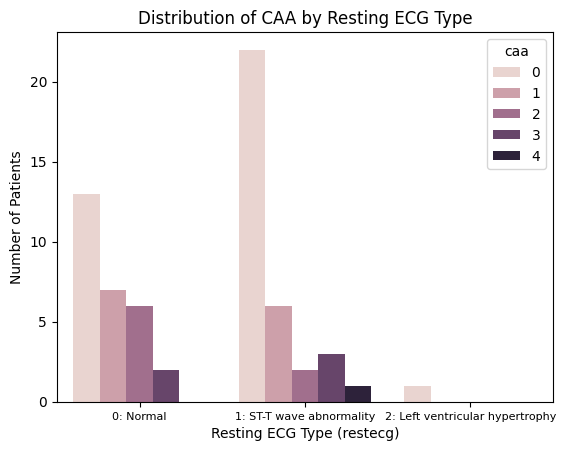

In [63]:
sns.countplot(x="restecg", hue="caa", data=pazienti)
plt.title("Distribution of CAA by Resting ECG Type")
plt.xlabel("Resting ECG Type (restecg)")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0, 1, 2], labels=["0: Normal", "1: ST-T wave abnormality", "2: Left ventricular hypertrophy"], fontsize=8)
plt.show()

sns.countplot(x="restecg", hue="caa", data=pazientitest)
plt.title("Distribution of CAA by Resting ECG Type")
plt.xlabel("Resting ECG Type (restecg)")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0, 1, 2], labels=["0: Normal", "1: ST-T wave abnormality", "2: Left ventricular hypertrophy"], fontsize=8)
plt.show()

Dai grafici è chiaro chela maggior parte dei pazienti ha 0 vasi colorati (0), indipendentemente dal tipo di ECG. Il numero di pazienti diminuisce all'aumentare del numero di vasi colorati, suggerendo che avere molti vasi colorati è poco comune.

**In particolare, il gruppo con "Anomalie dell'onda ST-T" (caa = 1) mostra una maggiore probabilità di avere valori di caa diversi da 0.**

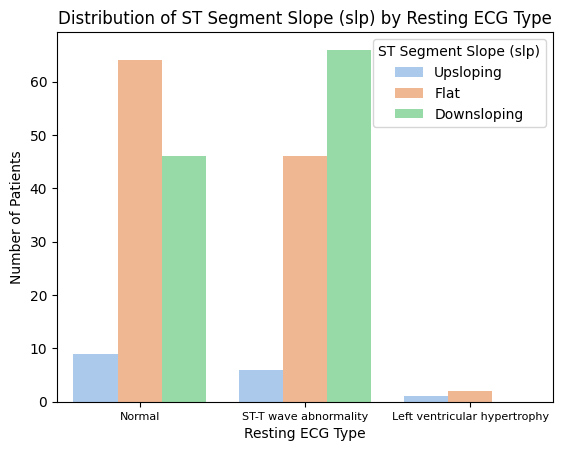

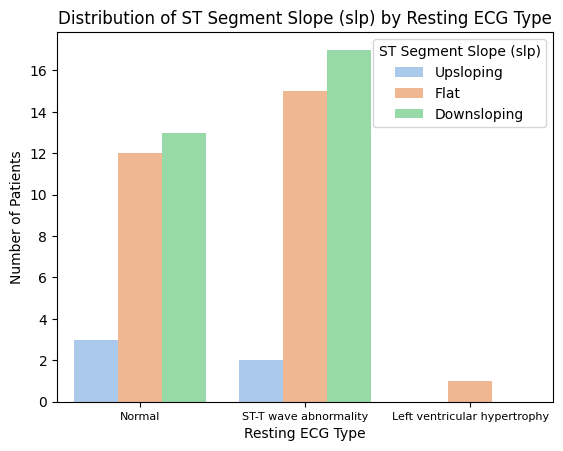

In [64]:
def ecg_distribution(data):
    sns.countplot(x="restecg", hue="slp", palette= "pastel", data=data)
    plt.xticks([0, 1, 2], ["Normal", "ST-T wave abnormality", "Left ventricular hypertrophy"], fontsize=8)
    plt.title("Distribution of ST Segment Slope (slp) by Resting ECG Type")
    plt.xlabel("Resting ECG Type")
    plt.ylabel("Number of Patients")
    plt.legend(title="ST Segment Slope (slp)", labels=["Upsloping", "Flat", "Downsloping"])
    plt.show()

ecg_distribution(pazienti)
ecg_distribution(pazientitest)

Anche in questo caso di associazione tra slp e restecg sembra esserci una possibile relazione tra il tipo di ECG e la pendenza del segmento ST. In particolare, il tipo 1 (Anomalie dell'onda ST-T) sembra essere associato a una maggiore probabilità di avere una pendenza "Flat" (slp = 1).

**Concludendo, tutti i grafici mostrano una chiara tendenza per i pazienti con "Anomalie dell'onda ST-T" (restecg = 1) ad avere una maggiore proporzione di diagnosi positive ("Heart Disease = Yes") rispetto ai pazienti con altri tipi di ECG.**

## IPOTESI N. 6 Pur non comprendendone la natura, è importante considerare la variabile thall (unknown) e analizzarla?

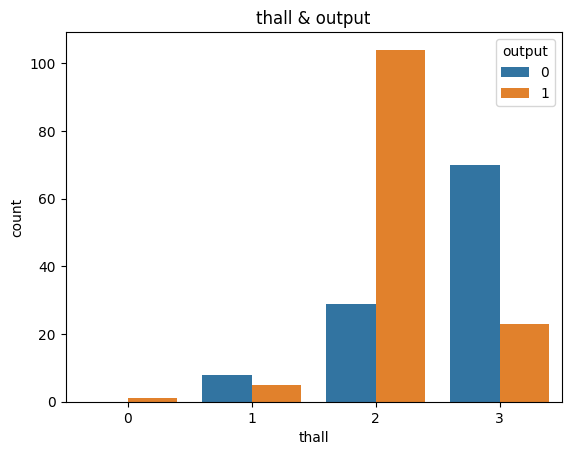

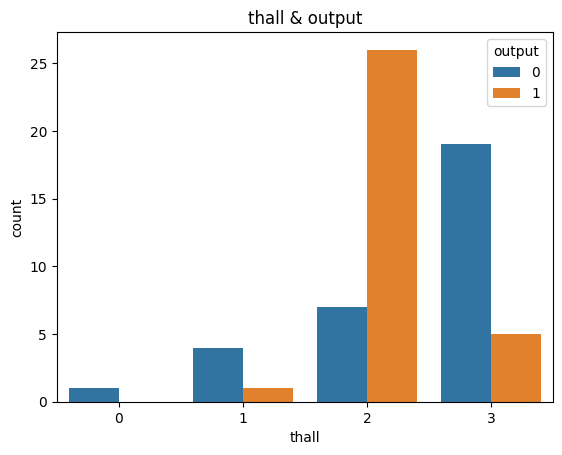

In [65]:
sns.countplot(x='thall', hue='output', data= pazienti)
plt.title ("thall & output")
plt.show()

sns.countplot(x='thall', hue='output', data= pazientitest)
plt.title ("thall & output")
plt.show()

Per prima cosa è importante sottolineare che thall è una **variabile categorica** in cui il valore 2 è il più frequente, seguito dal valore 3. I valori 0 e 1 sono molto meno frequenti.

I due countplot suggeriscono una **forte associazione tra thall e output**. In particolare, i valori più alti di thall (2 e 3) sembrano essere associati a una maggiore probabilità di avere la malattia. Questi risultati suggeriscono che thall può essere un indicatore molto utile per predire la presenza di malattia.

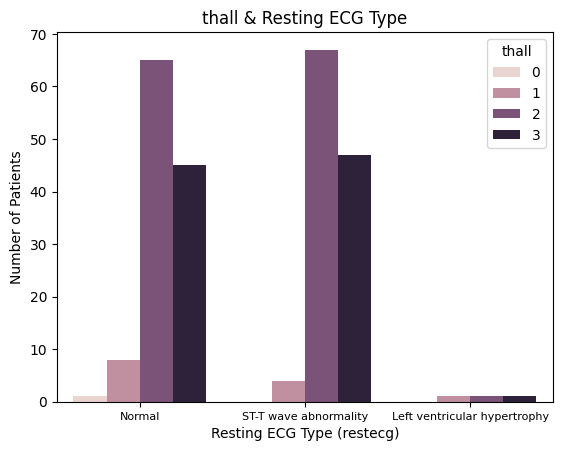

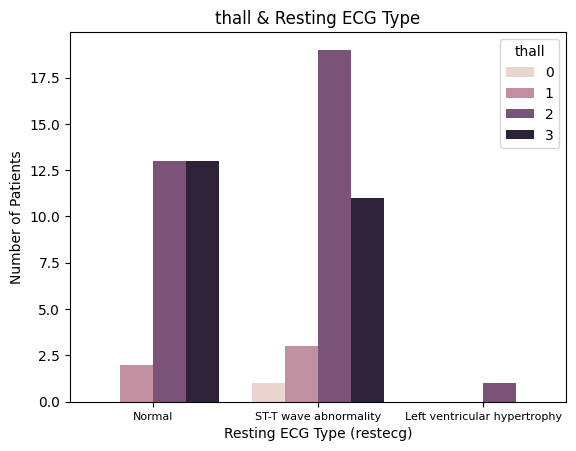

In [66]:
restecg_labels = ["Normal", "ST-T wave abnormality", "Left ventricular hypertrophy"]
ax = sns.countplot(x="restecg", hue="thall", data=pazienti)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(restecg_labels, fontsize = 8 )
plt.title("thall & Resting ECG Type")
plt.xlabel("Resting ECG Type (restecg)")
plt.ylabel("Number of Patients")
plt.show()

restecg_labels = ["Normal", "ST-T wave abnormality", "Left ventricular hypertrophy"]
ax = sns.countplot(x="restecg", hue="thall", data=pazientitest)
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(restecg_labels, fontsize = 8 )
plt.title("thall & Resting ECG Type")
plt.xlabel("Resting ECG Type (restecg)")
plt.ylabel("Number of Patients")
plt.show()

Sembra esserci una forte associazione tra thall e restecg. In particolare i pazienti con ECG normale (restecg = 0) e anomalie dell'onda ST-T (restecg = 1) tendono ad avere valori di thall 2 e 3, ma anche in misura minore valori 0 e 1.
I pazienti con ipertrofia ventricolare sinistra (restecg = 2) hanno quasi esclusivamente valori di thall 2 e 3.

<ipython-input-67-dd491fc1045c>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No Angina", "Exercise-Induced Angina"])


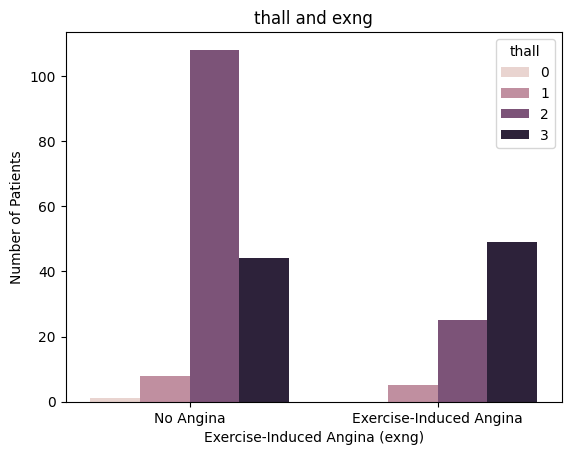

<ipython-input-67-dd491fc1045c>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No Angina", "Exercise-Induced Angina"])


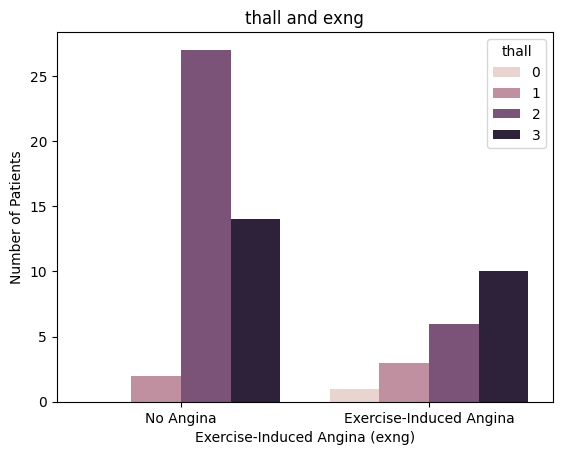

In [67]:
ax = sns.countplot(x="exng", hue="thall", data=pazienti)
ax.set_xticklabels(["No Angina", "Exercise-Induced Angina"])
plt.title("thall and exng")
plt.xlabel("Exercise-Induced Angina (exng)")
plt.ylabel("Number of Patients")
plt.show()

ax = sns.countplot(x="exng", hue="thall", data=pazientitest)
ax.set_xticklabels(["No Angina", "Exercise-Induced Angina"])
plt.title("thall and exng")
plt.xlabel("Exercise-Induced Angina (exng)")
plt.ylabel("Number of Patients")
plt.show()

Il grafico conferma le osservazioni fatte per il quelli superiori. Anche in questo caso sembra esserci una forte associazione tra thall e exng. In particolare, sia i pazienti con che senza angina tendono ad avere valori di thall 2 e 3.

Concludendo, si osserva una forte associazione tra thall e la diagnosi di malattia cardiaca (output). In particolare, i pazienti con valori più alti di thall (2 e 3) tendono ad avere una maggiore probabilità di essere diagnosticati con malattia cardiaca. Inoltre, thall è associata ad altre variabili cliniche, come restecg (ECG a riposo) e exng (angina indotta da esercizio), suggerendo che potrebbe fornire informazioni complementari a quelle fornite da queste altre variabili. **L'associazione tra thall e la diagnosi suggerisce anche che thall potrebbe avere un valore predittivo nella diagnosi di malattia cardiaca.**

# Fase 3: **Modellazione**

In [68]:
import numpy as np

from sklearn import svm, tree
from sklearn.metrics import *

train = pd.read_csv("sample_data/2.train_dataset.csv", sep=",")
test = pd.read_csv("sample_data/2.test_dataset.csv", sep=",")

Abbiamo preparato l'ambiente caricando i due file, il primo di train (riguarda 240 pazienti), il secondo di test (63 pazienti). La colonna che ci interessa è quella denominata "Output" perchè contiene l'etichetta, ovvero se è stata diagnosticata la malattia (0 = no, 1 = si). Verifichiamo quanti malati ci sono, per capire se i dataset sono bilanciati.

In [69]:
print("Totale malati:")
print(train["output"].value_counts()[1])

print("Totale malati")
print(test["output"].value_counts()[1])

Totale malati:
133
Totale malati
32


In [70]:
train_percent = train['output'].value_counts(normalize=True) * 100
print("Distribuzione dei malati in percentuale nel train:")
print(train_percent)

test_percent = test['output'].value_counts(normalize=True) * 100
print("Distribuzione dei malati in percentuale nel test:")
print(test_percent)

Distribuzione dei malati in percentuale nel train:
output
1    55.416667
0    44.583333
Name: proportion, dtype: float64
Distribuzione dei malati in percentuale nel test:
output
1    50.793651
0    49.206349
Name: proportion, dtype: float64


I dataset sono bilanciati perchè entrambi contengono una percentuale intorno al 50% di malati e di sani, questo ci permetter di verificare accuratezza e matrice di confusione, che altrimenti potrebbero non essere attendibili.  
Nonostante questo bilanciamento, effettueremo anche verifiche di precision e recall, sebbene non necessarie in questo contesto.

# Preparazione del Dataset

In [71]:
print("Train dataset info:")
print(train.info())
print(train.describe())

print("Test dataset info:")
print(test.info())
print(test.describe())

Train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       240 non-null    int64  
 1   sex       240 non-null    int64  
 2   cp        240 non-null    int64  
 3   trtbps    240 non-null    int64  
 4   chol      240 non-null    int64  
 5   fbs       240 non-null    int64  
 6   restecg   240 non-null    int64  
 7   thalachh  240 non-null    int64  
 8   exng      240 non-null    int64  
 9   oldpeak   240 non-null    float64
 10  slp       240 non-null    int64  
 11  caa       240 non-null    int64  
 12  thall     240 non-null    int64  
 13  output    240 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.4 KB
None
              age         sex          cp      trtbps        chol         fbs  \
count  240.000000  240.000000  240.000000  240.000000  240.000000  240.000000   
mean    54.654167    0.666667   

Con questa analisi vediamo, sia per il train che per il test, il riepilogo dei valori contenuti, i valori massimi e minimi e se ci sono valori nulli o meno (quest'ultima informazione era già stata analizzata più sopra nella fase 1). Non sono presenti valori testuali, altrimenti avremmo proceduto nel sostiture questi con valori numerici.

Possiamo notare che le percentili del valore Trtbps (pressione sanguigna all'ingresso in ospedale ) sono pressochè simili in entrambi i dataset, perciò potremmo assegnare un valore categorico a questo parametro e raggruppare in quattro categorie i valori:

* Primo percentile, 25%, valori fino a 120 = 1
* Secondo percentile, fino a 50% da 120 a 130 = 2
* Terzo percentile, fino a 75% dei dati, fino a 140
* Oltre il terzo percentile, valori oltre 140  

Per semplicità, faremo questo esperimento in un secondo momento, dopo aver fatto le previsioni con il dataset originale e sul dataset basato sulle variabili prese in considerazione precedentemente.



#Classificatori

Separiamo la colonna dell'etichetta (Output) dagli altri dati, sia per il dataset di train che per quello di test.

In [72]:
# per apprendimento
X_train = train.drop("output", axis=1)
Y_train = train["output"]

# per il test
X_test = test.drop("output", axis=1)
Y_test = test["output"]

Verifichiamo le variabili ottenute

In [73]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,64,1,0,120,246,0,0,96,1,2.2,0,1,2
1,47,1,2,138,257,0,0,156,0,0.0,2,0,2
2,59,1,0,110,239,0,0,142,1,1.2,1,1,3
3,58,1,1,120,284,0,0,160,0,1.8,1,0,2
4,52,0,2,136,196,0,0,169,0,0.1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,56,1,1,130,221,0,0,163,0,0.0,2,0,3
236,61,0,0,145,307,0,0,146,1,1.0,1,0,3
237,56,1,2,130,256,1,0,142,1,0.6,1,1,1
238,43,1,2,130,315,0,1,162,0,1.9,2,1,2


In [74]:
Y_train

,output
0,0
1,1
2,0
3,0
4,1
...,...
235,1
236,0
237,0
238,1


In [75]:
X_test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,59,1,0,164,176,1,0,90,0,1.0,1,2,1
1,47,1,0,112,204,0,1,143,0,0.1,2,0,2
2,49,1,2,118,149,0,0,126,0,0.8,2,3,2
3,45,1,0,104,208,0,0,148,1,3.0,1,0,2
4,58,0,2,120,340,0,1,172,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,37,1,2,130,250,0,1,187,0,3.5,0,0,2
59,62,0,0,138,294,1,1,106,0,1.9,1,3,2
60,68,1,2,118,277,0,1,151,0,1.0,2,1,3
61,52,1,0,108,233,1,1,147,0,0.1,2,3,3


In [76]:
Y_test

,output
0,0
1,1
2,0
3,1
4,1
...,...
58,1
59,0
60,1
61,1


In questo modo abbiamo X_train che contiene i dati dei pazienti e Y_train le etichette corrispondenti. Questi verranno usati dalla tecnica di machine learning per creare un modello predittivo.
X_test verrà usato per fare la previsione, la quale verrà salvata nella variabile Y_pred. Confronteremo poi Y_pred con i valori reali contenuti in Y_test.
  
Al momento non riteniamo opportuno rimuovere alcuna colonna, dunque procediamo con la previsione basata sul dataset completo.

#IPOTESI N. 1: previsione con dataset completo

##Support-Vector Machine (SVM)

In [77]:
model_svm = svm.SVC(kernel='linear', C=1, random_state=0)
model_svm.fit(X_train, Y_train)
#gli impartisco di apprendere (fit)

SVC(C=1, kernel='linear', random_state=0)

In [78]:
Y_pred = model_svm.predict(X_test)
Y_pred
#gli chiedo di fare una previsione

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In un tempo molto breve (1 secondo) ho ottenuto una lista di etichette che corrispondono a "malato" = 1 e "sano" = 0. Adesso posso fare un confronto con i dati effettivi che ho

In [79]:
Y_test

,output
0,0
1,1
2,0
3,1
4,1
...,...
58,1
59,0
60,1
61,1


Da un primo sguardo possiamo notare già dalle prime righe che la tecnica ha sbagliato la previsione della terza persona (al numero 2) prevedendola malata, quando invece sappiamo che è sana. Stessa cosa per la persona successiva. Andiamo dunque a verificare **l'accuratezza**.

In [80]:
accuracy_score(Y_test, Y_pred)

0.8253968253968254

Rileviamo un 82% di previsioni giuste
Vediamo adesso la **matrice di confusione**

In [81]:
confusion_matrix(Y_test, Y_pred, labels=[0,1])

array([[26,  5],
       [ 6, 26]])

La matrice di confusione ci fa sapere che sono stati previsti correttamente 26 pazienti sani e 26 pazienti malati, mentre 6 sono le persone previste sane, sbagliando (falsi negativi) e 5 previste erroneamente malate (falsi positivi). I risultati sembrano positivi ma dobbiamo tenere presente che 6 persone sono state erroneamente previste sane, quando invece sono malate.
Approfondiamo l'attendibilità verificando anche **precision** e **recall**

In [82]:
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.84      0.81      0.83        32

    accuracy                           0.83        63
   macro avg       0.83      0.83      0.83        63
weighted avg       0.83      0.83      0.83        63



Anche questi risultati sono molto buoni, sia precision che recall hanno un valore sopra il 70%

##Decision Tree

In [83]:
model_dt = tree.DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [84]:
Y_pred = model_dt.predict(X_test)
Y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

Usando la tecnica Decision Tree il tempo di calcolo scende a 0 secondi.

Confrontiamo la predizione con i dati che conosciamo:

In [85]:
Y_test

,output
0,0
1,1
2,0
3,1
4,1
...,...
58,1
59,0
60,1
61,1


A colpo d'occhio notiamo anche in questo caso alcuni errori sulla previsione (la seconda persona, la penultima etc).
Procediamo con le nostre verifiche di **accuratezza, matrice di confusione, precision e recall**:

In [86]:
accuracy_score(Y_test, Y_pred)

0.746031746031746

In [87]:
confusion_matrix(Y_test, Y_pred, labels=[0,1])

array([[23,  8],
       [ 8, 24]])

In [88]:
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        31
           1       0.75      0.75      0.75        32

    accuracy                           0.75        63
   macro avg       0.75      0.75      0.75        63
weighted avg       0.75      0.75      0.75        63



Notiamo che tutti i parametri ci dicono che la tecnica SVM ha prodotto una previsione migliore:
  
* Accuratezza: 82% contro 74%.  
* Matrice di confusione: i falsi positivi e i falsi negativi salgono a 8 contro 5 e 6 di SVM.  
*  Precision e Recall: i valori rimangono sopra il 70% ma sono comunque inferiori a quelli ottenuti con SVM (sopra 80%).



Infine osserviamo che la tecnica SVM è stata più accurata, con valori tutti sopra lo 0.7.    

**Per concludere, analizzando il dataset completo abbiamo una previsione migliore usando la tecnica SVM, ma sacrificando 1 secondo di tempo per fare la previsione.**

#IPOTESI N.2: Previsione su dataset selettivo

Dalle analisi preliminari(Fase 1 e 2), abbiamo notato come alcuni fattori sembrino essere correlati alle diagnosi positive, nello specifico:


*   Età
*   Genere
*   Tipo di dolore al petto (cp)
*   Frequenza cardiaca massima (thalachh)
*   ECG a riposo (restecg)
*   Agina da sforzo (exng)
*   Valore sconosciuto (thall)

Procederemo dunque a fare una previsione usando solamente questi parametri e osserveremo se questo migliora o peggiora la qualità delle previsioni.

##SVM

In [89]:
X_train2 = train[["age","sex","cp", "thalachh", "restecg", "exng", "thall"]]
Y_train2 = train["output"]

X_test2 = test[["age","sex","cp", "thalachh", "restecg", "exng", "thall"]]
Y_test2 = test["output"]

In [90]:
model_svm = svm.SVC(kernel='linear', C=1, random_state=0)
model_svm.fit(X_train2, Y_train2)

SVC(C=1, kernel='linear', random_state=0)

In [91]:
Y_pred2 = model_svm.predict(X_test2)
Y_pred2

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [92]:
Y_test2

,output
0,0
1,1
2,0
3,1
4,1
...,...
58,1
59,0
60,1
61,1


In [93]:
accuracy_score(Y_test2, Y_pred2)

0.7936507936507936

In [94]:
confusion_matrix(Y_test2, Y_pred2, labels=[0,1])

array([[21, 10],
       [ 3, 29]])

In [95]:
cr = classification_report(Y_test2, Y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.68      0.76        31
           1       0.74      0.91      0.82        32

    accuracy                           0.79        63
   macro avg       0.81      0.79      0.79        63
weighted avg       0.81      0.79      0.79        63



Confrontando i risultati della tecnica SVM sul dataset completo con quella usata adesso prendendo in considerazione solo alcune variabili,vediamo che con questa otteniamo un **risparmio di tempo** (-1 secondo) e una previsione peggore sotto alcuni aspetti e migliore sotto altri:  
* Accuratezza: 79% contro 82%  
* Matrice di confusione: sono aumentati i falsi positivi (da 5 a 10) ma abbiamo **tre falsi negativi** in meno (da 6 a 3) questo aspetto è da prendere in considerazione perchè in questo modo le persone malate non diagnosticate sono scese a 3.    
* Precision: coerentemente con quanto sopra, l'analisi conferma un lieve miglioramento delle previsioni che riguardano i pazienti previsti correttamente (88% contro 81%( ma un peggioramento delle diagnosi dei positivi (74% contro 84%)
* Recall: peggiora sulla categoria 0 (68% contro 84%) ma migliora sulla categoria 1 (91% contro 81%)

**Per concludere, confrontando le due tecniche SVM possiamo dire che quella fatta sul dataset completo è più accurata, ma quella fatta sul dataset selettivo ha previsto correttamente un maggior numero di diagnosi (29 contro 26) perciò potrebbe essere quella migliore da usare se il nostro obiettivo è trovare il maggior numero di malati.**

## Decision Tree

In [96]:
model_dt = tree.DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train2, Y_train2)

Y_pred2 = model_dt.predict(X_test2)
Y_pred2

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [97]:
accuracy_score(Y_test2, Y_pred2)

0.7142857142857143

In [98]:
confusion_matrix(Y_test2, Y_pred2, labels=[0,1])

array([[19, 12],
       [ 6, 26]])

In [99]:
cr = classification_report(Y_test2, Y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.61      0.68        31
           1       0.68      0.81      0.74        32

    accuracy                           0.71        63
   macro avg       0.72      0.71      0.71        63
weighted avg       0.72      0.71      0.71        63



Rispetto alla previsione n.1, confrontando i risultati di entrambi i Decision Tree con lo stesso impiego di tempo (0 seondi) abbiamo una previsione peggiore:  
* Accuratezza: lieve peggioramento (da 74% a 71%)  
* Matrice di confusione: I falsi positivi aumentano (12 contro 8) ma diminuiscono i falsi negativi (da 8 a 6), questo è un fattore positivo.    
* Precision: lieve aumento sulla categoria 0 (da 74% a 76%) e peggiora la categoria 1 (da 75% a 68%)
* Recall: coerentemente con la matrice di confusione, lieve diminuzione sulla categoria dei sani ( da 74% a 61%) e migliora per la categoria dei malati (da 75% a 81%)

**Tuttavia, se confrontiamo il risultato di questa tecnica con il risultato di SVM su questo dataset, notiamo che SVM ha fatto una previsione migliore**:  
* Accuratezza 79% contro il 71% del DT  
* Matrice di confusione: aumentano i falsi negativi (da 3 a 6) e i falsi positivi ( da 10 a 12)
* Precision: diminuisce su entrambe le categorie (88% contro 76% sulla 0 e 74% e 68% sulla seconda)  
* Recall: diminuita sulla categoria 0 (61% contro 68%) e sulla categoria 1 (da 91% a 81%)

**Notiamo che per adesso la previsione migliore viene fatta con la tecnica SVM fatta sul dataset selettivo, sia in termini di correttezza delle previsioni (in particolare i falsi negativi) che in termini di risparmio di tempo (1 secondo risparmiato).**

# IPOTESI N.3: Previsione con dataset contenente i valori della pressione sanguigna raggruppati in 4 categorie

##SVM

Proviamo, come dicevamo all'inizio, a raggruppare i valori della pressione sanguigna (trtbps) in quattro categorie, in base al percentile:

* Primo percentile, 25%, valori fino a 120 = 1
* Secondo percentile, fino a 50% da 120 a 130 = 2
* Terzo percentile, fino a 75% dei dati, fino a 140
* Oltre il terzo percentile, valori oltre 140
  
N.B.: l'analisi verrà fatta sul dataset **completo** sostituendo la colonna "trtbps" con la nuova colonna "Categoria Pressione"

In [100]:
df = pd.read_csv('sample_data/2.train_dataset.csv')
# Calcoliamo i percentili
percentile_25 = np.percentile(df['trtbps'], 25)
percentile_50 = np.percentile(df['trtbps'], 50)
percentile_75 = np.percentile(df['trtbps'], 75)

# Funzione che assegna la categoria in base al valore
def categoria_pressione(valore, percentile_25, percentile_50, percentile_75):
    if valore < percentile_25:
        return 1
    elif valore < percentile_50:
        return 2
    elif valore < percentile_75:
        return 3
    else:
        return 4

# Applicare la funzione a tutta la colonna 'categoria_pressione
df['categoria_pressione'] = df['trtbps'].apply(lambda x: categoria_pressione(x, percentile_25, percentile_50, percentile_75))

df = df.drop(columns=['trtbps']) #droppo trtbps

df.to_csv('sample_data/2.train_dataset3.csv', index=False) #ho salvato il nuovo dataset per poterlo usare

# Controllo che ci sia tutto
print(df)

     age  sex  cp  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  \
0     64    1   0   246    0        0        96     1      2.2    0    1   
1     47    1   2   257    0        0       156     0      0.0    2    0   
2     59    1   0   239    0        0       142     1      1.2    1    1   
3     58    1   1   284    0        0       160     0      1.8    1    0   
4     52    0   2   196    0        0       169     0      0.1    1    0   
..   ...  ...  ..   ...  ...      ...       ...   ...      ...  ...  ...   
235   56    1   1   221    0        0       163     0      0.0    2    0   
236   61    0   0   307    0        0       146     1      1.0    1    0   
237   56    1   2   256    1        0       142     1      0.6    1    1   
238   43    1   2   315    0        1       162     0      1.9    2    1   
239   58    1   2   240    0        0       154     1      0.6    1    0   

     thall  output  categoria_pressione  
0        2       0                    2  
1  

In [101]:
# Calcoliamo i percentili sul file test
df = pd.read_csv('sample_data/2.test_dataset.csv')

percentile_25 = np.percentile(df['trtbps'], 25)
percentile_50 = np.percentile(df['trtbps'], 50)
percentile_75 = np.percentile(df['trtbps'], 75)

def categoria_pressione(valore, percentile_25, percentile_50, percentile_75):
    if valore < percentile_25:
        return 1
    elif valore < percentile_50:
        return 2
    elif valore < percentile_75:
        return 3
    else:
        return 4

df['categoria_pressione'] = df['trtbps'].apply(lambda x: categoria_pressione(x, percentile_25, percentile_50, percentile_75))

df = df.drop(columns=['trtbps'])

df.to_csv('sample_data/2.test_dataset3.csv', index=False)

print(df)

    age  sex  cp  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  \
0    59    1   0   176    1        0        90     0      1.0    1    2   
1    47    1   0   204    0        1       143     0      0.1    2    0   
2    49    1   2   149    0        0       126     0      0.8    2    3   
3    45    1   0   208    0        0       148     1      3.0    1    0   
4    58    0   2   340    0        1       172     0      0.0    2    0   
..  ...  ...  ..   ...  ...      ...       ...   ...      ...  ...  ...   
58   37    1   2   250    0        1       187     0      3.5    0    0   
59   62    0   0   294    1        1       106     0      1.9    1    3   
60   68    1   2   277    0        1       151     0      1.0    2    1   
61   52    1   0   233    1        1       147     0      0.1    2    3   
62   56    1   0   184    0        0       105     1      2.1    1    1   

    thall  output  categoria_pressione  
0       1       0                    4  
1       2       1

In [102]:
#preparo i file train e test
train = pd.read_csv('sample_data/2.train_dataset3.csv')
test = pd.read_csv('sample_data/2.test_dataset3.csv')

X_train3 = train.drop(columns=['output'])
Y_train3 = train['output']

X_test3 = test.drop(columns=['output'])
Y_test3 = test['output']

# Controllo per essere sicura
print(X_train3.shape)
print(Y_train3.shape)
print(X_test3.shape)
print(Y_test3.shape)


(240, 13)
(240,)
(63, 13)
(63,)


In [103]:
#verifico che sia tutto ok
print("Verifica colonne (X_train3):", X_train3.columns)
print("Verifica colonne (X_test3):", X_test3.columns)

Verifica colonne (X_train3): Index(['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'categoria_pressione'],
      dtype='object')
Verifica colonne (X_test3): Index(['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'categoria_pressione'],
      dtype='object')


In [104]:

model_svm = svm.SVC(kernel='linear', C=1, random_state=0)
model_svm.fit(X_train3, Y_train3)

SVC(C=1, kernel='linear', random_state=0)

In questo caso il tempo di apprendimento varia da 1 a 2 secondi. Questo è un fattore da tenere in considerazione, per la qualità della previsione.

In [105]:
Y_pred3 = model_svm.predict(X_test3)
Y_pred3

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [106]:
Y_test3

,output
0,0
1,1
2,0
3,1
4,1
...,...
58,1
59,0
60,1
61,1


Verifichiamo accuratezza e matrice di confusione

In [107]:
accuracy_score(Y_test3, Y_pred3)

0.8095238095238095

In [108]:
confusion_matrix(Y_test3, Y_pred3, labels=[0,1])

array([[25,  6],
       [ 6, 26]])

In [109]:
cr = classification_report(Y_test3, Y_pred3)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        31
           1       0.81      0.81      0.81        32

    accuracy                           0.81        63
   macro avg       0.81      0.81      0.81        63
weighted avg       0.81      0.81      0.81        63



Confrontiamo con i risultati della **previsione iniziale, fatta con tecnica SVM e basata sul dataset completo** (1_SVM):  
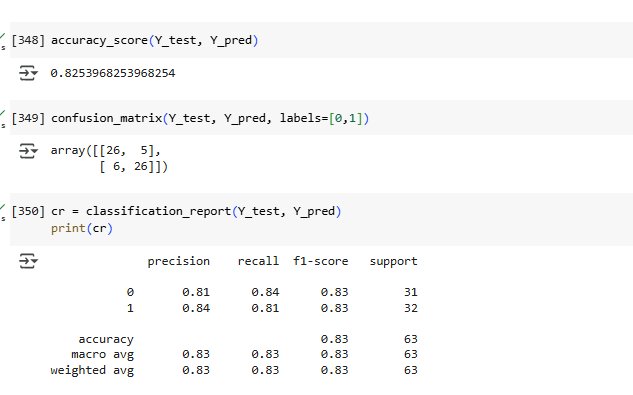  
Cosa notiamo:  
* Accuratezza: diminuita da 82% a 80%
* Matrice di confusione: sono aumentati i falsi positivi (da  a 6) e invariati i falsi negativi (6)  
*  Precision e recall presentano un valore di 81% denotando un peggioramento della precisione della diagnosi con valore 1 (da 84% a 81) e recall con valore 0 (da 84% a 81%).

Se confrontiamo invece con la **previsione fatta con SVM sul dataset numero 2**, i risultati sono i seguenti (2_SVM):  
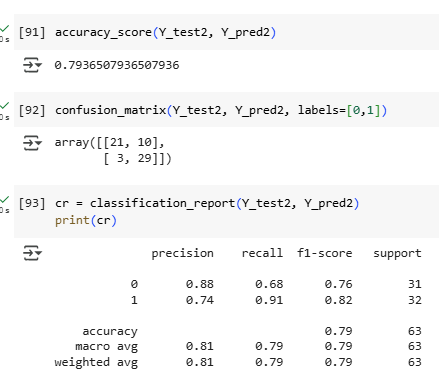

* Accuratezza: leggermente migliorata da 79% a 80%
* Matrice di confusione: diminuiscono notevolmente i falsi positivi (6 contro 10) ma aumentano i falsi negativi 6 contro 3. Questo è un problema perchè abbiamo perso tre pazienti non diagnosticandogli la malattia  
*  Precision: diminuisce sulla categoria 0 (88% contro 81%) e aumenta sulla categoria 1 (74% contro 81%)  
* Recall: aumenta notevolemnte sulla categoria 0 (da 68% a 81%) e diminuisce sulla categoria 1 (da 91% a 81%)


**Confermiamo che l'analisi che ha dato i risultati migliori sia in termini di tempo che in termini di correttezza (in particolare in riferimento alla previsione della diagnosi di malattia) è la tecnica SVM applicata al dataset numero 2.**

##Decision Tree

In [110]:
model_dt = tree.DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train3, Y_train3)

DecisionTreeClassifier(random_state=0)

In [111]:
Y_pred3 = model_dt.predict(X_test3)
Y_pred3

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [112]:
accuracy_score(Y_test3, Y_pred3)

0.7301587301587301

In [113]:
confusion_matrix(Y_test3, Y_pred3, labels=[0,1])

array([[21, 10],
       [ 7, 25]])

In [114]:
cr = classification_report(Y_test3, Y_pred3)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.68      0.71        31
           1       0.71      0.78      0.75        32

    accuracy                           0.73        63
   macro avg       0.73      0.73      0.73        63
weighted avg       0.73      0.73      0.73        63



Confrontiamo con il **Decision Tree fatto sul secondo dataset**, in quanto abbiamo visto essere il più accurato (2_DT):  
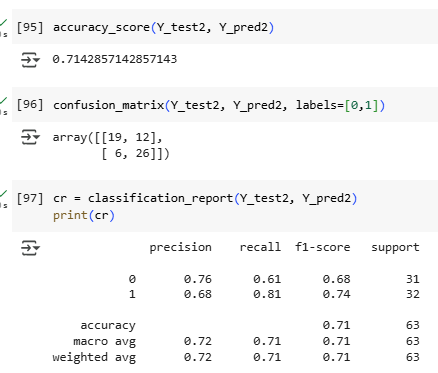  
* Accuratezza: aumenta leggermente da 71% a 73%  
* Matrice di confusione: diminuiscono i falsi positivi (da 12 a 10) ma aumentano i falsi negativi (da 6 a 7)
* Precision: diminuisce da 76% a 75% sulla categoria 0 e aumenta da 68% a 71% sulla categoria 1  
* Recall: aumenta da 61% a 73% sulla categoria 0 e diminuisce da 81% a 73% sulla categoria 1  


**Vediamo che nonostante sia aumentata lievemente l'accuratezza, rimane più precisa la previsione fatta con la tecnica Decision Tree sul secondo dataset in quanto i falsi negativi sono 6 contro i 7 ottenuti con questa.**

#Conclusioni

Abbiamo provato a effettuare delle previsioni sul dataset, usando sia la tecnica SVM che la tecnica DT.  

I dataset utilizzati sono stati quello base, un secondo dataset contenente solamente alcune variabili ed un terzo dataset al quale abbiamo sostituito una colonna numerica, raggruppando in tre categorie i suoi valori.

Sulla base delle analisi possiamo dire che la tecnica Support-Vector Machine ha prodotto delle previsioni migliori sia in termini di accuratezza (intorno all' 80%) che di matrice di confusione.
La tecnica Decision Tree in questo caso ha prodotto risultati meno interessanti, mantenendo un'accuratezza sotto il 74% e un minimo di falsi negativi pari a 6.

Per valutare la qualità delle previsioni effettuate, consideriamo particolarmente importante osservare la **matrice di confusione** in quanto, relativamente al caso specifico, è fondamentale diagnosticare correttamente più malattie possibili, perciò il parametro che riteniamo centrale nella valutazione è il numero di **falsi negativi ottenuti**, ovvero quante diagnosi **non** sono state fatte (e dunque quanti pazienti non vengono curati perchè inconsapevoli di essere malati).  

Riteniamo che la previsione più soddisfacente sia stata ottenuta con la tecnica SVM sul dataset numero due, ovvero selezionando solamente alcune variabili. In questo caso i falsi negativi sono stati solamente 3.  

Suggeriamo perciò di procedere con le previsioni relative a questa casistica, usando la tecnica SVM e limitando il numero di variabili coinvolte. Potrebbe essere auspicabile approfondire l'interazione fra le variabili per verificare quale combinazione di queste possa portare ad una previsione ancora più meticolosa.